# Lab 1  MSDS Data Mining -- North Carolina Education Data Set

** Austin Hancock, Shravan Kuchkula, Kevin Okiah, Damarcus Thomas **

![](http://dthomas.mathematical.guru/Img/NCZones.png)

## Introduction

> The North Carolina Department of Public Instruction (NCDPI) is charged with implementing the state's public school laws and the State Board of Education's policies and procedures governing pre-kindergarten through 12th grade public education. The elected State Superintendent of Public Instruction leads the Department and functions under the policy direction of the State Board of Education.

> The agency provides leadership and service to the 115 local public school districts and 2,500+ traditional public schools, 150+ charter schools, and the three residential schools for students with hearing and visual impairments. The areas of support include curriculum and instruction, accountability, finance, teacher and administrator preparation and licensing, professional development and school business support and operations.

> The NCDPI develops the Standard Course of Study, which describes the subjects and course content that is taught in North Carolina public schools, and the assessments and accountability model used to evaluate student, school and district success.

> The NCDPI administers annual state and federal public school funds totaling approximately $9.2 billion and licenses the approximately 117,000 teachers and administrators who serve public schools. The NCDPI's primary offices are in Raleigh, with four regional alternative licensing centers in Concord, Fayetteville, Elm City and Catawba. Approximately 30,000 new teacher and administrator licenses are issued annually from these centers. The NCDPI's work extends to the NC Center for the Advancement of Teaching with locations in Cullowhee and Ocracoke, and the NC Virtual Public School – the second largest virtual public school in the nation. The state agency also works closely with nine Regional Education Service Alliances/ Consortia and six regional accountability offices.

** The mission, vision and goals of the Public Schools of North Carolina is as follows: **

**VISION:**
> Every public school student will graduate ready for post secondary education and work, prepared to be a globally engaged and 
> productive citizen


**MISSION:**
> The State Board of Education has the constitutional authority to lead and uphold the system of public education in North 
> Carolina.


**GOALS:**
> Goal: Every student in the NC Public School System graduates from high school prepared for work, further education and 
> citizenship.
>
> Goal: Every student has a personalized education.
>
> Goal: Every student, every day has excellent educators.
>
> Goal: Every school district has up-to-date financial, business, and technology systems to serve its students, parents and 
> educators.
>
> Goal: Every student is healthy, safe, and responsible.


### Business Understanding 

* __Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?)__
      
> For this project will be using North Carolina High Schools education data. The data is a combination of multiple data tables publicly available by the North Carolina Department of Public Instruction (NCDPI)  which is charged with implementing the state's public school laws and the State Board of Education's policies and procedures governing pre-kindergarten through 12th grade public education. You can learn more about the data by visiting http://www.ncpublicschools.org/data/reports/

> The data is collected in an effort to compile all measurable state-wide statistics on schools in North Carolina to inform and 
educate all stakeholders on the state of the educational system.  

> Once compiled and preprocessed, the data could then be mined to answer multiple questions like: what are key factors that 
increase SAT/ACT scores, and how can schools retain masterful teachers, and ultimately, identify factors within schools that 
can increase graduation rates. 

> The data should be harnessed to hightlight ways and strategies on how to improve the strengths and weaknesses of the school system at large.
     
    
* __Describe how you would define and measure the outcomes from the dataset.__  

> Our initial goal is to understand how the education system in North Carolina is at the moment and interpretating the State  theme 'Educating the Whole Child'. 

> Examining the mission and vision of the public school systems would help guide us to zoom in on certain objective measureable criteria within the data, like how can the such as increase trends in various school features that examine both formative and summative scores and quantitative and  qualativity data that are indicitive of the essentials of a successful school system. 

> What parts of the state  have low test scores? Do some schools have better access to computers for the students? How does the state allocate funds to the districts? By investigating these questions, and others like them, we will have a more wholistic understanding of the dataset. 
          
* __How would you measure the effectiveness of a good prediction algorithm?__ 

> Our team aims to predict the graduation rate of High Schools in the state of North Carolina based on the multiple features taken from the North Carolina dataset motivated by the mission vision and goals of the education system. To access the effectiveness of our algorithm we will begin by performing regression diagnostics for any unusual data and nonlinearity in our model. We will look at MSE, MAE, or RMSE among others to see how well our model fits the data. To guage the accuracy of our model, a 5 fold Cross-Validation will be performed.

> If the results shows innovation and suggestions what is known best practices or even better leads to new information that was unseen and forecasted by tradition means and current policies, procedures, and protocals.
        

In [1]:
import os 

# The normal imports
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

# Import the stats library
from scipy import stats

# These are the plottinglibraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning


# Command for plots to appear in the iPython Notebook
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Starting with the dataset that Dr.Drew helped clean.->highschools saved to .cvs file from graduations rates (2) notebook
wd = os.getcwd() #get working directory
highschools = pd.read_csv(wd+'/data/highschools.csv', low_memory=False)
#highschools = pd.read_csv(wd+'\\data\\highschools.csv', low_memory=False)
highschools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 294 entries, Unnamed: 0 to Percent GLP
dtypes: bool(8), float64(264), int64(9), object(13)
memory usage: 1.0+ MB


### Data Meaning Type 

In [2]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_colwidth', 150)
pd.read_excel(wd+'/data/DataMeaningType.xlsx')

,Attribute,Meaning,Type
0,unit_code,Code to identify School/LEA/State,Object
1,type_cd_txt,Type of school (Chater or Public),Object
2,category_cd,"Category of School (E, M, H, I, T, or A)",Object
3,school_type_txt,Description of School type,Object
4,calendar_only_txt,Description of Calendar (Traditional or Year-Round),object
5,title1_type_flg,Title I Status,bool
6,clp_ind_flg,Consistently low performing school,bool
7,focus_clp_flg,Focus school designation based on CLP,bool
8,summer_program_flg,Summer school program included in Read to Achieve results,bool
9,asm_no_spg_flg,No School Performance Grade due to alternative school status,bool


#### Data Dictionary
> Since this datasets has numerous columns we needed a fast way to quickly find ColumnName description for easy reference. For exceptional work, we created a function to quickly pull the data from csv datafile. This involved converting the pdf to excel and formating the data for easy import into pandas. The code below is a working code for our data dictionary.

In [36]:
# This is a simple function to pull column description
DataDict = pd.read_excel(wd+'\\data\\DataMeaningType.xlsx', encoding = "ISO-8859-1")
DataDict.head()
#DataDict = DataDict.columns['COLUMN_NAME', 'DESCRIPTION']
def get_ColDescription(colname = 'Year'):
    colName = input("Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: ")
    
    print('You entered: ', colName.strip())
    temp = pd.DataFrame()
    colNames = colName.split(',')
    
    try:
        for i in range(0,len(colNames)):
            get = (DataDict[DataDict.Attribute==colNames[i].strip().lower()])
            temp = temp.append(get)
        return(temp)
    except Exception as e:
        print(e.args) 

get_ColDescription()

Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: expelled_per_c_num,st_prinyrs_0thru3_pct
You entered:  expelled_per_c_num,st_prinyrs_0thru3_pct


,Attribute,Meaning,Type
174,expelled_per_c_num,Expulsions per 100 students at the school level,float64
259,st_prinyrs_0thru3_pct,Percent of principals with 0 to 3 years of experience at state level,float64


### Data Quality 

In [3]:
#Get dimensions of the dataframe that we working with
highschools.shape

(478, 294)

> We begin by checking the dimensions of our dataset. We have 478 rows and 294 columns to start.

In [4]:
#Make a copy of the dataset to work with
HighschoolData = highschools.copy()

##### *Missing Data Statistics*

> In this section we explore missing data in the highschool data that was created from the original north carolina data. After exploring the missing data we will discusss the approach for handling them.

In [5]:
#Check for missing values
Temp = pd.DataFrame(HighschoolData.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with atleast 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic starts on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No of rows in HighschoolData: ',len(HighschoolData))
print('No of Columns in HighschoolData: ',len(HighschoolData.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No  of Complete data columns: ', len(HighschoolData.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(HighschoolData)))
print('No. of Columns more than 95% missing Values: ',sum(1 for item in MissingCount.DataMissing if item>=0.95*len(HighschoolData)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(HighschoolData.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(HighschoolData)))/len(HighschoolData.columns),3),'%')
print('% of Columns with more than 95% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item>=0.95*len(HighschoolData)))/len(HighschoolData.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with >95% missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(HighschoolData))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(100)))

##################################################
###              Stats on missing data         ###
##################################################
No of rows in HighschoolData:  478
No of Columns in HighschoolData:  294
No. of Columns with Missing data:  168
No  of Complete data columns:  126
No. of Columns with 100% missing Values:  47
No. of Columns more than 95% missing Values:  99
% of Columns with some Missing data:  57.143 %
% of Columns with 100% Missing data:  15.986 %
% of Columns with more than 95% Missing data:  33.673 %
 
##################################################
###        Columns with >95% missing data      ###
##################################################
    DataMissing                ColumnName   Missing %
0           478               Percent GLP  100.000000
1           478         total_expense_num  100.000000
2           478         GCE_RPF_State_Pct  100.000000
3           478         GCE_PRM_State_Pct  100.000000
4           478         GCE_LEP

> From above we note, of the 294 columns in HighSchoolData, 168 (57.14%) of them have some missing data. 47 (15.99%) of columns have all the data missing where 99 (33.67%) of the columns miss more than 95% of the data. For columns with 100% missing data we are left but to wonder if this were new fields introduced recently and the schools are not fully informed to collect this data or the data for this columns was not just collected by mistake. On the other hand, for the partally completed datasets, some schools might have left these columns blank if they didn't apply to them.

> For the sake of this analysis we will drop the columns that have `>95` missing data rather than try complete the missing data with either mean, median or mode. If we complete this large amount of missing rows of data with predetermined data, our model maybe baised and throw were predictions off.

In [6]:
#All columns from Original schoolData
AllColumns =HighschoolData.columns 

# All columns with some missing value
ColumnsWithMissingdata = MissingCount.ColumnName 

#columns with more than 95% missing data
Columns2Drop = MissingCount.ColumnName.head(99) 

#columns with missing values that are kept
Columns2Keep = MissingCount.ColumnName.tail(len(MissingCount)-99) 

#All the other columns except those with >95% missing data
SelectedColumns = list(set(AllColumns)-set(Columns2Drop)) 

#new dataset, columns with >95% missing data dropped

schoolDataNew = HighschoolData[SelectedColumns]

#drop the key column. 
del schoolDataNew['unit_code']

print("##################################################")
print("###", '          Orginal Highschooldata info     ',  "###")
print("##################################################")
print(HighschoolData.info())
print("##################################################")
print("###", '  Columns with >95 data missing   dropped ',  "###")
print("##################################################")
print(schoolDataNew.info())
schoolDataNew.head(5)


##################################################
###           Orginal Highschooldata info      ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 294 entries, Unnamed: 0 to Percent GLP
dtypes: bool(8), float64(264), int64(9), object(13)
memory usage: 1.0+ MB
None
##################################################
###   Columns with >95 data missing   dropped  ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 194 entries, lea_salary_expense_pct to lea_advance_dgr_pct
dtypes: bool(8), float64(167), int64(9), object(10)
memory usage: 698.4+ KB
None


,lea_salary_expense_pct,st_1yr_tchr_trnovr_pct,lea_emer_prov_teach_pct,st_not_highqual_class_all_pct,lea_avg_age_media_collection,lea_services_expense_pct,wap_num,focus_clp_flg,digital_media_pct,_1yr_tchr_trnovr_pct,...,st_ib_pct_4_or_above,st_cte_courses,highqual_class_pct,lea_total_expense_num,long_susp_per_c_num,st_sat_avg_score_num,lea_tchyrs_0thru3_pct,st_salary_expense_pct,lea_univ_college_courses,lea_advance_dgr_pct
0,0.631,0.148,NaN,0.037,NaN,0.074,NaN,False,NaN,0.000,...,0.75,NaN,0.964,8517.96,0.00,997,0.242,0.62,NaN,0.211
1,0.631,0.148,NaN,0.037,1999.0,0.074,64.0,True,0.00,0.128,...,0.75,NaN,0.860,8517.96,0.00,997,0.242,0.62,NaN,0.211
2,0.631,0.148,NaN,0.037,1999.0,0.074,66.0,False,0.00,0.200,...,0.75,NaN,0.893,8517.96,1.00,997,0.242,0.62,NaN,0.211
3,0.631,0.148,NaN,0.037,1999.0,0.074,70.0,False,0.01,0.140,...,0.75,NaN,0.859,8517.96,0.00,997,0.242,0.62,NaN,0.211
4,0.631,0.148,NaN,0.037,1999.0,0.074,74.0,False,0.00,0.098,...,0.75,NaN,0.882,8517.96,0.33,997,0.242,0.62,NaN,0.211


> In the code block above, we drop 99 columns which have >95% of the data missing. We also delete the unit_code column which is a key to identify the school/Lea/state. 

In [7]:
#Exploring the columns with missing dataset that are retained
df = schoolDataNew[Columns2Keep]
temp_df = df.copy() 
print("##################################################")
temp  = df.select_dtypes(include=['int','float'])
temp2  = df.select_dtypes(include=['object', 'bool'])
print("#      Columns with continious data (int, float) #")
print("##################################################")
temp.info()
print(" ")
print("##########################################")
print("#     Columns with Categorical data      #")
print("##########################################")
temp2.info()
print(" ")
print("Total # of columns: ",len(Columns2Keep))

##################################################
#      Columns with continious data (int, float) #
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 64 columns):
ib_pct_4_or_above                                 24 non-null float64
emer_prov_teach_pct                               61 non-null float64
lea_ib_pct_4_or_above                             185 non-null float64
lea_emer_prov_teach_pct                           229 non-null float64
ap_participation_pct                              324 non-null float64
AP_Courses_Offered                                338 non-null float64
ACT WorkKeys Score                                359 non-null float64
ap_pct_3_or_above                                 365 non-null float64
ap_ib_courses                                     368 non-null float64
univ_college_courses                              374 non-null float64
lea_books_per_student             

> In the code block above we explore the columns with missing data that we retained. we group the columns into two based on data type as we will have two different approaches for replacing the missing data;
1. #### Columns with continuous data types (ints and floats)
Of the 69 columns retained with missing data, 64 are of dtype float64. After reviewing individual columns description from the data dictionary, we choose to replace these missing float types with median. We didn't go with mean simply because with existance of outliers, mean would be screwed compared to median.
2. #### Columns with contegorical data types (objects and bool)
For the 5 categorical columns, we will be replacing the missing values with mode.

In [8]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df = schoolDataNew):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #catagorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()[0]))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

new_schooldata = ReplaceMissingdata(schoolDataNew)    

new_schooldata.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
lea_salary_expense_pct                              0
st_1yr_tchr_trnovr_pct                              0
lea_emer_prov_teach_pct                           249
st_not_highqual_class_all_pct                       0
lea_avg_age_media_collection                       91
lea_services_expense_pct                            0
wap_num                                            10
focus_clp_flg                                       0
digital_media_pct                                  91
_1yr_tchr_trnovr_pct                                3
lea_local_perpupil_num                              0
EVAAS Growth Status                                35
lea_ib_pct_4_or_above                             293
crime_per_c_num                                     0
lateral_teach_pct            

> In the code block above, we replaced missing catagorical values with mode and missing continuous values with median. A total of 69 columns with missing values have been cleaned.

In [9]:
new_schooldata.shape

(478, 194)

> Our final dataset has 478 rows and 194 columns

In [10]:
# function for getting column description from the data dictionary. 
# It is at the bottom of the notebook in the exceptional work section. Run it first before calling it in this cell
#get_ColDescription()

### Simple Statistics 

> We will be using the `new_schooldata` dataframe going forward for calculating the simple statistics.

In [11]:
# Make a copy of the dataset to work with
statsSchoolData = new_schooldata.copy()

# Extract Bool, Object and Numeric types into seperate df's
statsSchoolDataBool = statsSchoolData.loc[:, statsSchoolData.dtypes == bool]
statsSchoolDataObject = statsSchoolData.loc[:, statsSchoolData.dtypes == object]
statsSchoolDataNumeric = statsSchoolData.loc[:, (statsSchoolData.dtypes == float) | (statsSchoolData.dtypes == 'int64')]

# Remove spaces from column names. Eg: "State Gap Compared" becomes "State_Gap_Compared"
statsSchoolDataBool.columns = statsSchoolDataBool.columns.str.replace('\s+', '_')
statsSchoolDataObject.columns = statsSchoolDataObject.columns.str.replace('\s+', '_')
statsSchoolDataNumeric.columns = statsSchoolDataNumeric.columns.str.replace('\s+', '_')

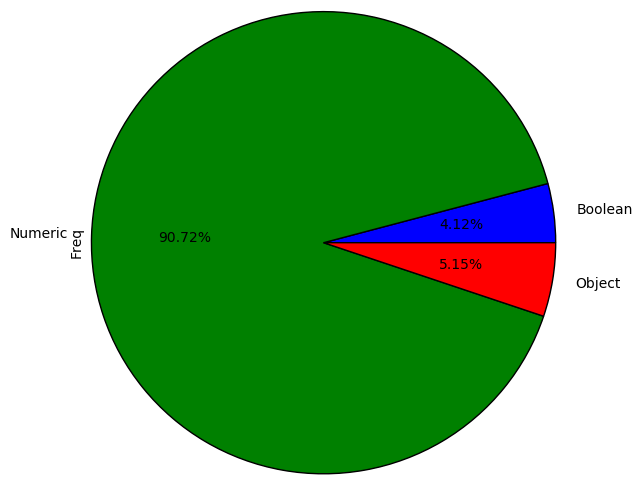

In [12]:
DatatypesFreq =  pd.DataFrame({'Datatype':['Boolean','Object','Numeric'],'Freq':[len(statsSchoolDataBool.columns),len(statsSchoolDataObject.columns)
                                ,len(statsSchoolDataNumeric.columns)]})

DatatypesFreq.Freq.groupby(DatatypesFreq.Datatype).sum().plot(kind='pie',autopct='%.2f%%', figsize=(6, 6))
my_colors = ['b', 'r', 'c']
plt.axis('equal')
plt.show()


> Majority of the attributes in this dataset is Numeric (float64 and int64) which accounts for 90.7% of the data.  Boolean and Object datatypes account for 4.12% and 5.15% of the data respectively.

##### Boolean Variables Simple Stats:

In [13]:
boolDescribe = statsSchoolDataBool.describe().T
def proportions(mySeries):
    return mySeries.value_counts(normalize=True).values[0]
boolDescribe['percent_false'] = 100 * statsSchoolDataBool.apply(proportions)
boolDescribe['percent_true'] = 100 * (1 - statsSchoolDataBool.apply(proportions))
boolDescribe

,count,unique,top,freq,percent_false,percent_true
focus_clp_flg,478,2,False,425,88.912134,11.087866
stem_flg,478,2,False,472,98.744770,1.255230
no_data_spg_flg,478,1,False,478,100.000000,0.000000
Grad_project_status,478,2,False,301,62.970711,37.029289
clp_ind_flg,478,2,False,422,88.284519,11.715481
summer_program_flg,478,2,False,299,62.552301,37.447699
asm_no_spg_flg,478,1,False,478,100.000000,0.000000
title1_type_flg,478,2,False,440,92.050209,7.949791


> Some interesting observations, 37% of schools have Grad_project_status and summer_program_flg, it will be interesting to see if they are the same set of school profiles and do this kind of programs actually improve the overall student success in terms of test score and graduation rate. Similarly, 11% of schools have clp_ind_flg and focus_clp_flg which could mean that schools which have clp_ind_flg might also have focus_clp_flg.

##### Object Variables Simple Stats:

In [14]:
statsSchoolDataObject.describe().T

,count,unique,top,freq
EVAAS_Growth_Status,478,3,Exceeded,187
esea_status,478,3,Non_Esea,459
SPG_Grade,478,5,C,214
Byod,478,2,No,314
1_to_1_access,478,2,No,351
calendar_only_txt,478,2,Traditional Calendar,470
type_cd_txt,478,1,Public,478
category_cd,478,3,H,459
school_type_txt,478,1,Regular School,478
State_Gap_Compared,478,2,N,448


> From above, we learn that most of the high schools in NC follow the Traditional calendar with an exception of 8 who follow the all year round calendar.

##### Numeric Variables Simple Stats:

> An outlier is a data point that is distinctly separate from the rest of the data. One definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile. First we begin by calculating if a column contains atleast 1 outlier by comparing the max and min values with the outlier range. Next, we determine how many data points in a column are considered as outliers. We report this statistics below:

In [15]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
numericDescribe = (statsSchoolDataNumeric.describe(include='all').T).round(decimals=3)

# Calculate outliers using this formula: first quartile – 1.5·IQR > outlier > third quartile + 1.5·IQR
numericDescribe['IQR'] = numericDescribe['75%'] - numericDescribe['25%']
numericDescribe['outliers'] = (numericDescribe['max'] > (numericDescribe['75%'] + (1.5 * numericDescribe['IQR']))) \
                            | (numericDescribe['min'] < (numericDescribe['25%'] - (1.5 * numericDescribe['IQR'])))

# Calculate IQR for each column of the dataframe.
IQR = statsSchoolDataNumeric.quantile(.75) - statsSchoolDataNumeric.quantile(.25)

# Calculate the upper and lower outlier values
upperOutlier = statsSchoolDataNumeric.quantile(.75) + (1.5 * (IQR))
lowerOutlier = statsSchoolDataNumeric.quantile(.25) - (1.5 * (IQR))

# Check if each value of mySeries lies within the outlier range.
# If the value is greater than upperOutlier mark it True
# If the value is lower than lowerOutlier mark it True
# return the total number of outliers for that series.
def numberOfOutliers(mySeries):
    return sum((mySeries > upperOutlier.loc[mySeries.name, ]) |\
               (mySeries < lowerOutlier.loc[mySeries.name,]))

# Store the result in a new column
numericDescribe['num_outliers'] = statsSchoolDataNumeric.apply(numberOfOutliers)
numericDescribe.sort_values('num_outliers', ascending=False, inplace=True)
newColOrder = ['count', 'outliers', 'num_outliers', 'IQR', 'mean', \
               'min', '25%', '50%', '75%', 'max', 'std']
numericDescribe.reindex(columns=newColOrder)

,count,outliers,num_outliers,IQR,mean,min,25%,50%,75%,max,std
lea_emer_prov_teach_pct,478.0,True,197,0.000,0.006,0.000,0.005,0.005,0.005,0.055,0.006
lea_ib_pct_4_or_above,478.0,True,178,0.000,0.771,0.430,0.760,0.760,0.760,0.950,0.085
total_specialized_courses,478.0,True,117,0.000,0.979,0.140,1.000,1.000,1.000,1.000,0.080
Math_Course_Rigor_Score,478.0,True,92,0.000,98.276,71.000,100.000,100.000,100.000,100.000,4.135
lea_total_specialized_courses,478.0,True,90,0.000,0.981,0.743,1.000,1.000,1.000,1.000,0.052
long_susp_per_c_num,478.0,True,85,0.080,0.103,0.000,0.000,0.000,0.080,2.010,0.234
univ_college_courses,478.0,True,82,0.116,0.203,0.000,0.036,0.071,0.152,1.000,0.308
digital_media_pct,478.0,True,70,0.020,0.044,0.000,0.010,0.010,0.030,1.000,0.114
AP_Courses_Offered,478.0,True,60,3.000,7.822,1.000,6.000,7.000,9.000,24.000,4.077
lea_long_susp_per_c_num,478.0,True,60,0.150,0.130,0.000,0.000,0.040,0.150,1.250,0.205


In [16]:
numericDescribe.outliers.sum()

117

> Select 5 columns with most outliers to display violin plots.

In [17]:
top5df = statsSchoolDataNumeric[numericDescribe.index.values[0:5]]

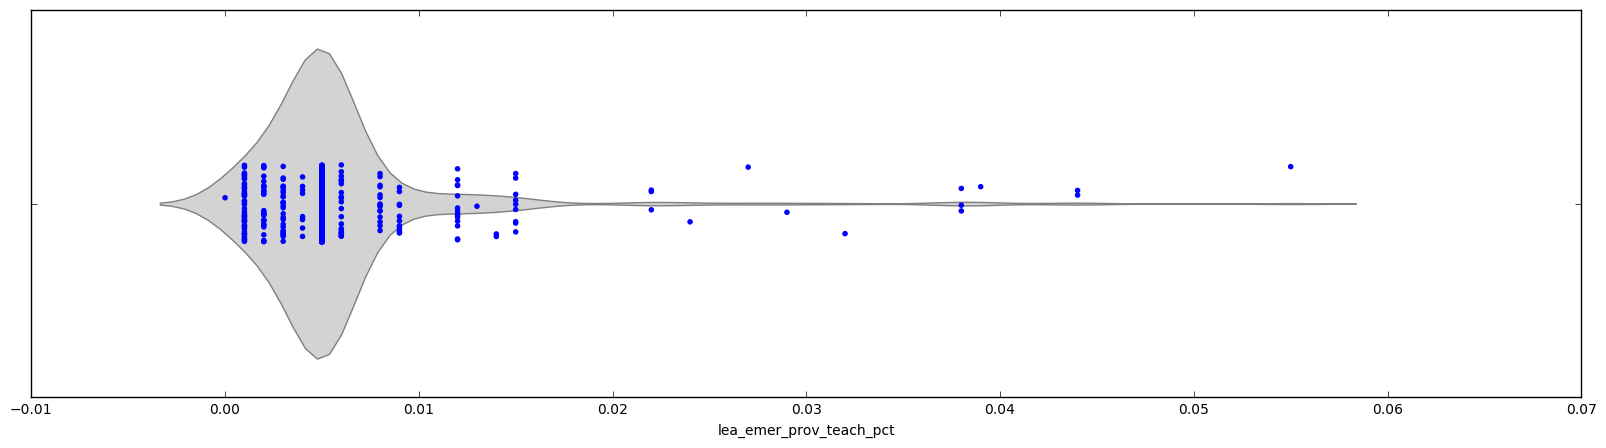

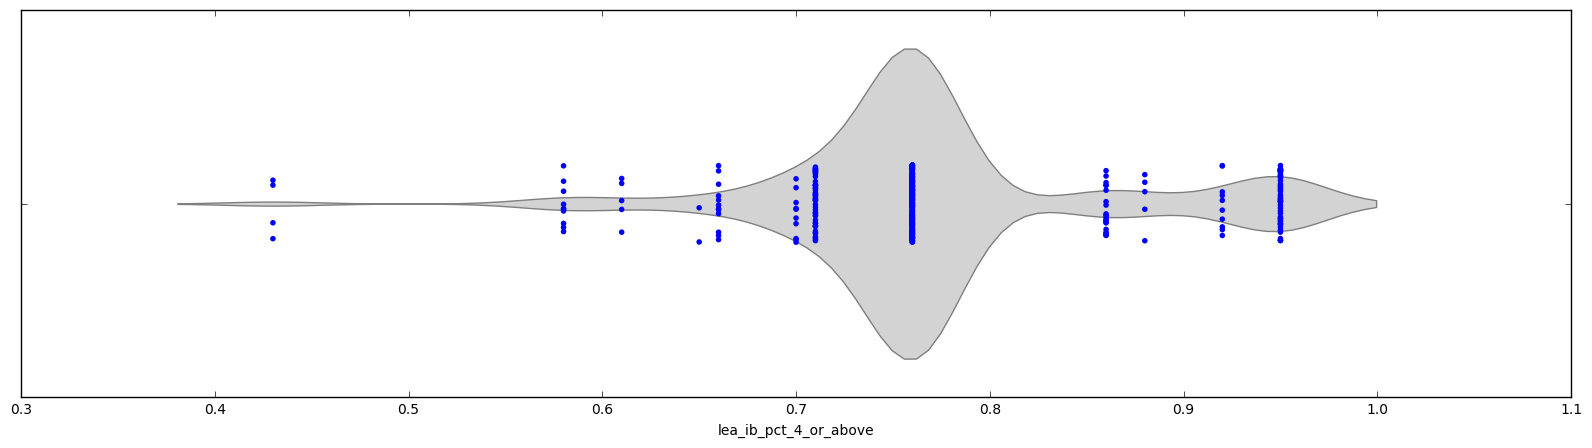

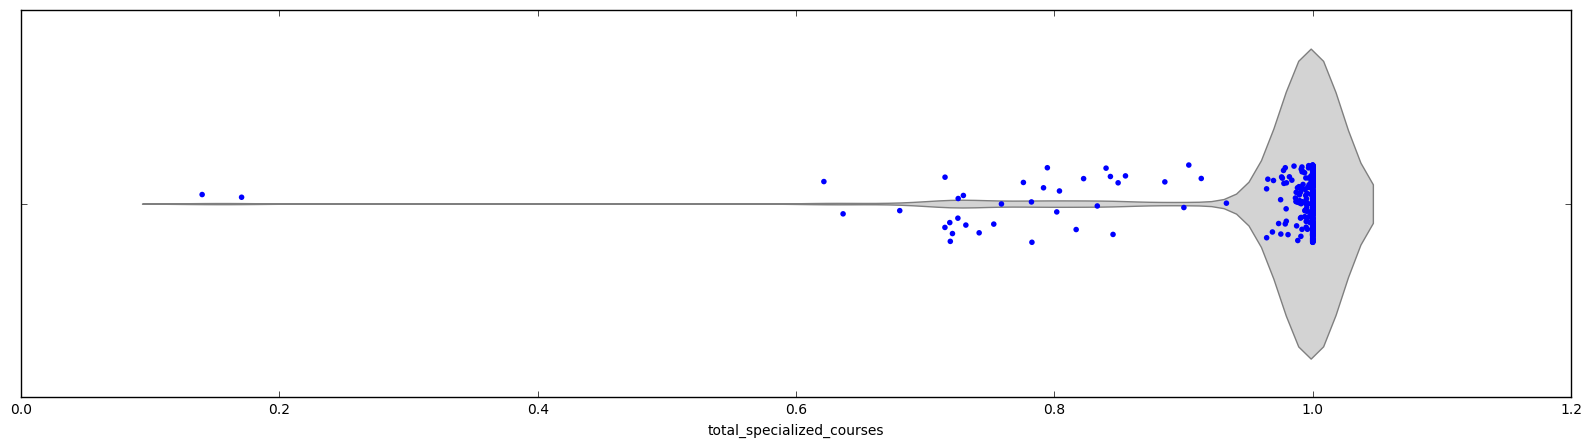

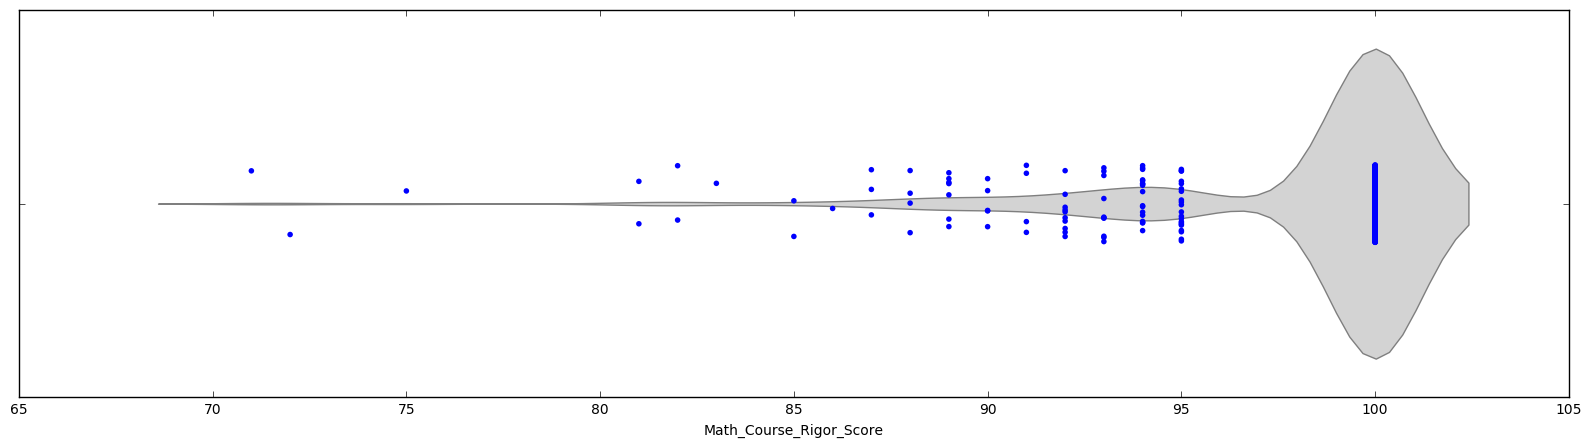

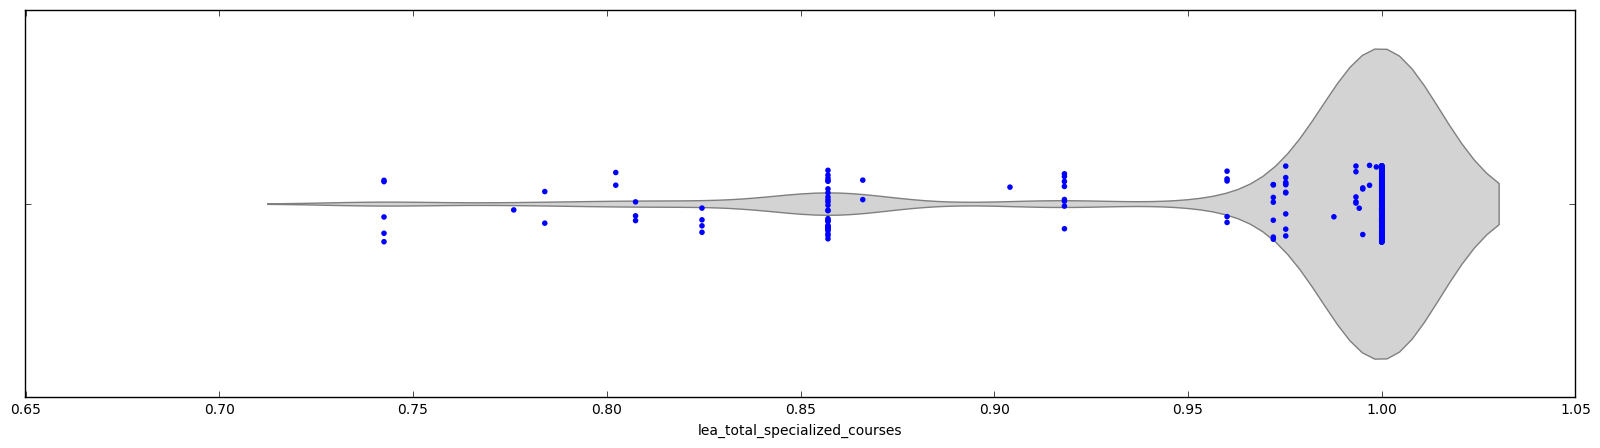

In [18]:
for i in range(0, len(top5df.columns)):
    plt.figure(figsize=(20,5))
    sns.violinplot(x = top5df.iloc[:,i], data=top5df, inner=None, color='lightgray')
    sns.stripplot(x = top5df.iloc[:,i], data=statsSchoolDataNumeric, size=4, jitter=True)
    #plt.title(top5df.iloc[:,i].name)
    plt.show()

> The effect of outliers can be seen. Some are heavily left-skewed and some are heavily right-skewed. Implications of having outliers must be carefully studied. For now we choose to retain all the outlier and we will revisit them during modeling.

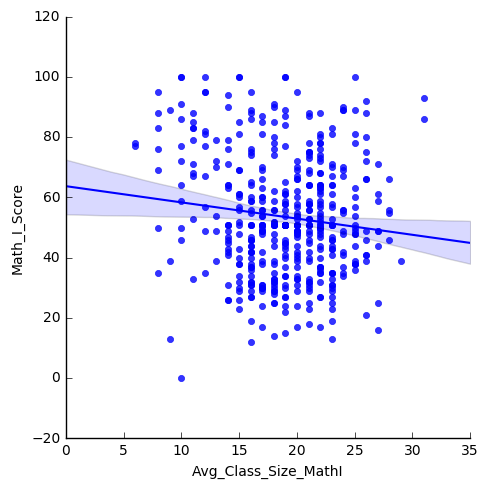

In [19]:
ax = sns.lmplot(x = 'Avg_Class_Size_MathI', y = 'Math_I_Score', data=statsSchoolDataNumeric)

### Visualize Attributes

category_cd
A      4
H    459
T     15
dtype: int64

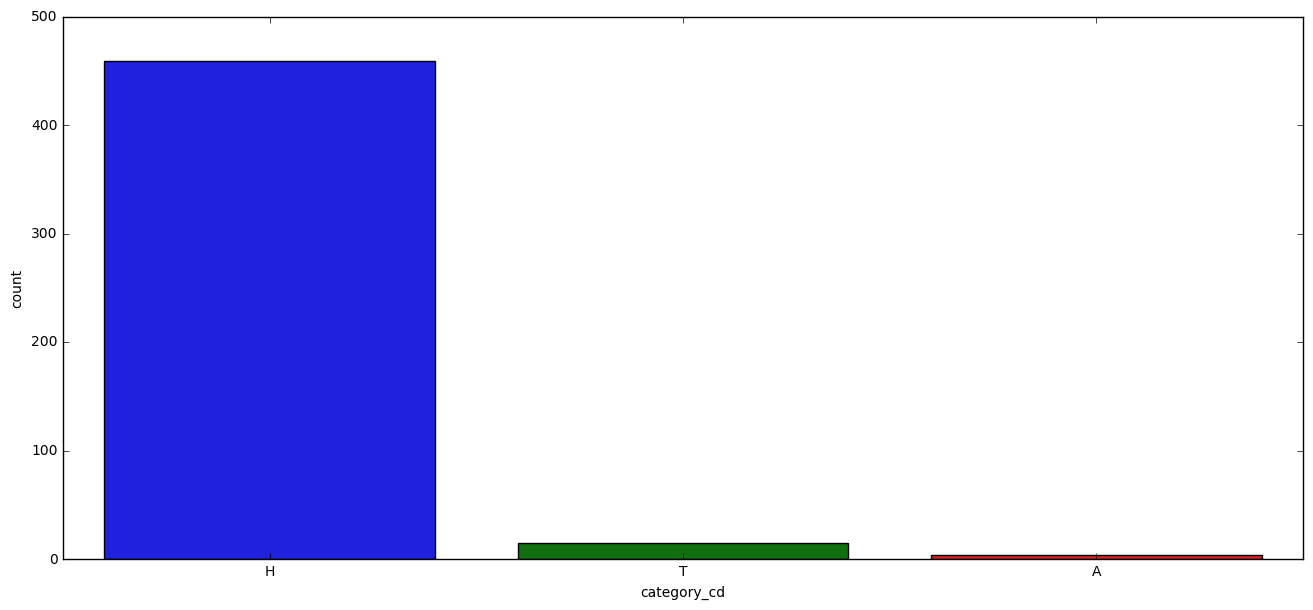

In [20]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("category_cd",data=new_schooldata)
new_schooldata.groupby(["category_cd"]).size()

> Of the 478 High schools, 459 are of fall in  category H ,15 of catagory T and 4 of category A. See summary table below for school category descriptions

Category | Description|Count |Percentage
--- | --- | ---|---
H | Schools with high school grades 9-13 | 459|96.02%
T | schools with middle and high school grades | 15|3.14
A | Schools with elementary, middle and high school grades | 4|0.84%

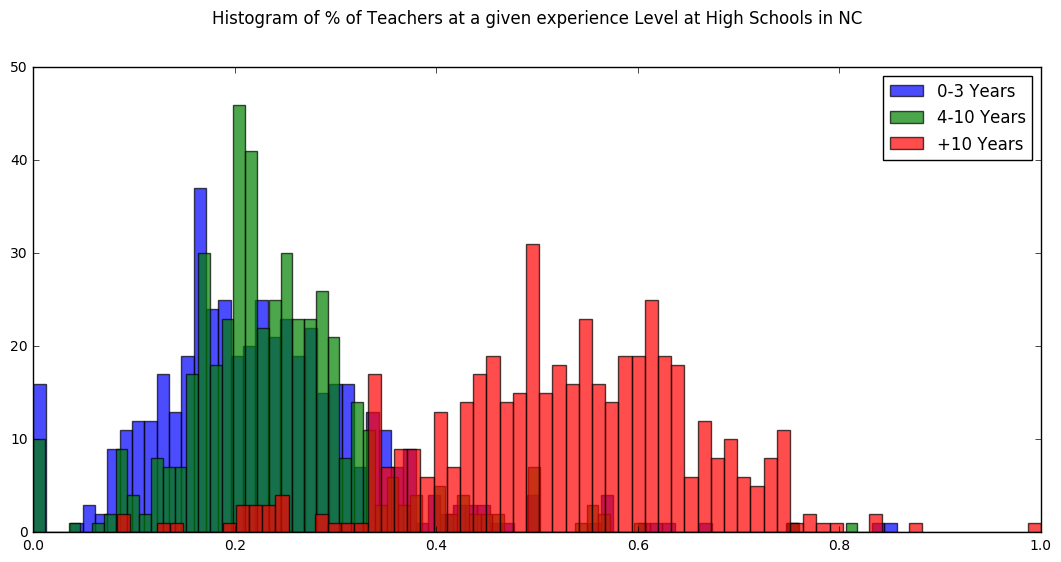

In [21]:
#histograms of teacher experience
#with sns.axes_style("darkgrid"):
X =new_schooldata.Tch_Exp_Pct_0_3_Years
Y  =new_schooldata.Tch_Exp_Pct_4_10_Years
Z =new_schooldata["Tch_Exp_Pct_10+_Years"]
fig, ax = plt.subplots(figsize=(13, 6))
bins = 70
figure_title = "Histogram of % of Teachers at a given experience Level at High Schools in NC"
plt.title(figure_title, y=1.08)
plt.hist(X, bins, alpha=0.7, label='0-3 Years')
plt.hist(Y, bins, alpha=0.7, label='4-10 Years')
plt.hist(Z, bins, alpha=0.7, label='+10 Years')
plt.legend(loc='upper right')
plt.show()

> From Histograms above most schools have teachers with ~20% experience between 4-10 Years. There is little difference in distributions of percentages of teachers with 0-3 years and 4 to 10 years. There is one outlier school where 100% of the teachers have more that 10 years of experience. It will be interesting to if teacher experience actually translates to increased graduation rate or even better performance in assessment tests.

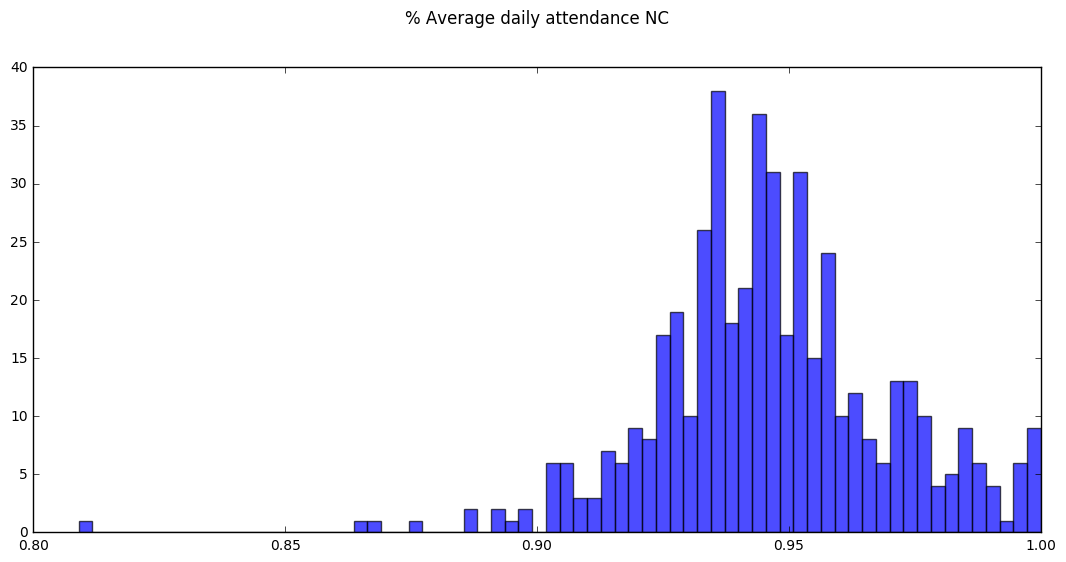

In [22]:
#
A =new_schooldata.avg_daily_attend_pct
fig, ax = plt.subplots(figsize=(13, 6))
figure_title = "% Average daily attendance NC"
plt.title(figure_title, y=1.08)
bins = 70
plt.hist(A, bins, alpha=0.7)
plt.show()


> Most schools have pretty good average daily attendance percentage >90%. We have only one school struggling with average daily attendance of ~82%. Further 

### Explore Joint Attributes 

### 1. School Performance Measures

In [23]:
#Categorical columns for joint plots explorations
temp = new_schooldata.select_dtypes(['bool','object'])

#store the selected columns list in array
categorical_cols = temp.columns
print('Categorical columns')
print('-------------------------------')
print(categorical_cols)

print('-------------------------------')
print('')
print('-------------------------------')
print('Educator Experience')
#list of columns for teacher experience measures
teacher = [col for col in new_schooldata.columns if 'Tch' in col]
Teacher = [teacher[1], teacher[2],teacher[6]]
print(Teacher)
print('-------------------------------')
print('')
print('-------------------------------')
#List of Columns for achivement score measures
#Achivement_measures  = ['The ACT Score','Overall Achievement Score','sch_percent_college_enrolled_16_mos_post_grad','EVAAS Growth Score','Math Course Rigor Score','sat_avg_score_num','Cohort Graduation Rate Standard Score']
Achievement_scores = [col for col in new_schooldata.columns if 'score' in col]
Achievement_Scores = [col for col in new_schooldata.columns if 'Score' in col]

#combine the above two arrays
Achievement_measures = Achievement_Scores+Achievement_scores 
print('Achievement Measures columns')
print('-------------------------------')
Achievement_measures

Categorical columns
-------------------------------
Index(['focus_clp_flg', 'EVAAS Growth Status', 'esea_status', 'SPG Grade',
       'stem_flg', 'no_data_spg_flg', 'Byod', '1_to_1_access',
       'calendar_only_txt', 'Grad_project_status', 'clp_ind_flg',
       'summer_program_flg', 'asm_no_spg_flg', 'type_cd_txt',
       'title1_type_flg', 'category_cd', 'school_type_txt',
       'State Gap Compared'],
      dtype='object')
-------------------------------

-------------------------------
Educator Experience
['Tch_Exp_Pct_10+_Years', 'Tch_Exp_Pct_4_10_Years', 'State_Tch_Exp_Pct_0_3_Years']
-------------------------------

-------------------------------
Achievement Measures columns
-------------------------------


['Cohort Graduation Rate Standard Score',
 'English II Score',
 'Biology Score',
 'The ACT Score',
 'ACT WorkKeys Score',
 'SPG Score',
 'Math I Score',
 'EVAAS Growth Score',
 'Overall Achievement Score',
 'Math Course Rigor Score',
 'nat_sat_avg_score_num',
 'lea_sat_avg_score_num',
 'sat_avg_score_num',
 'st_sat_avg_score_num']

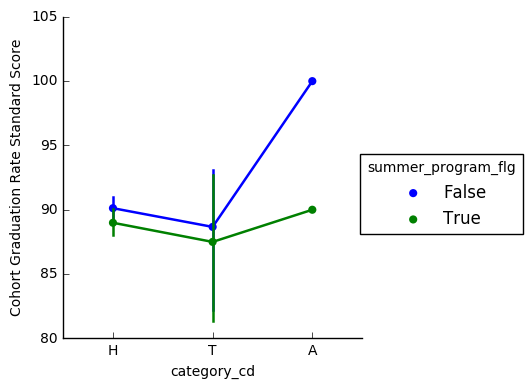

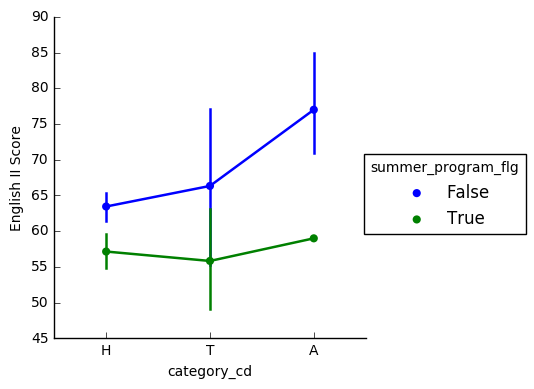

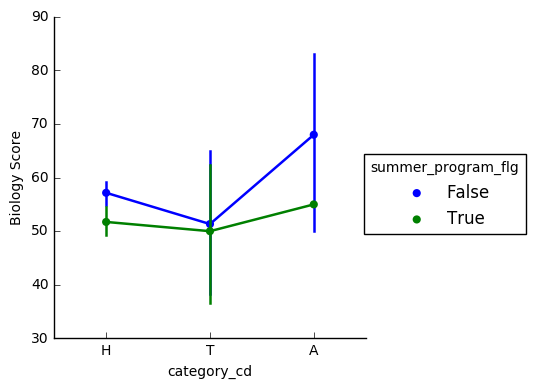

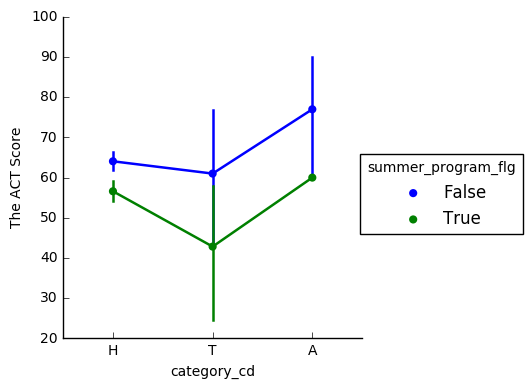

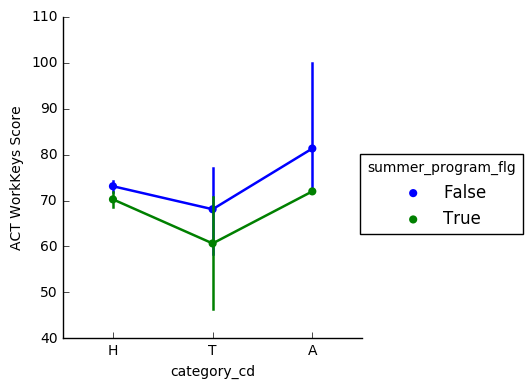

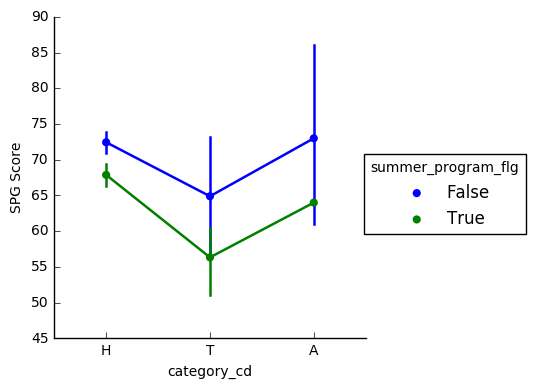

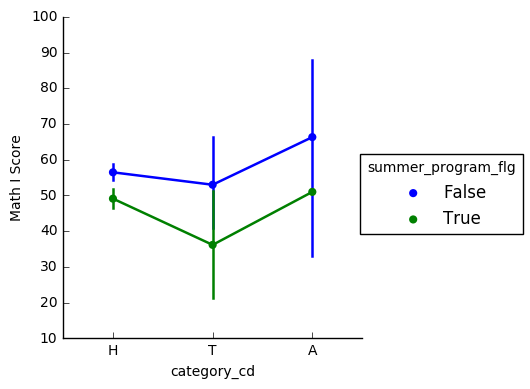

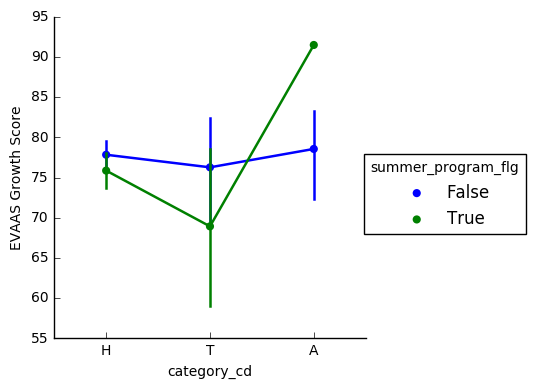

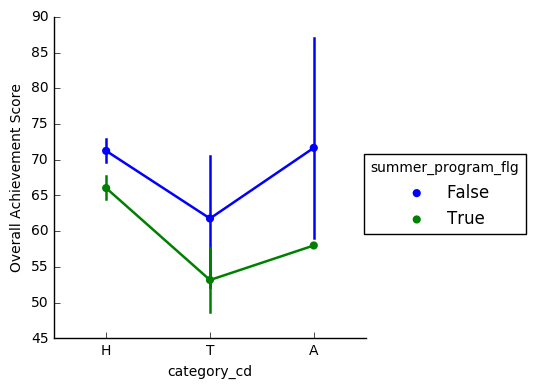

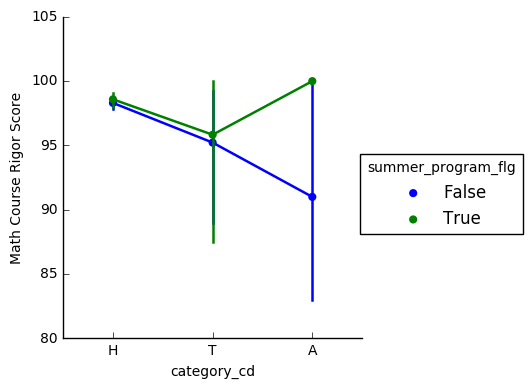

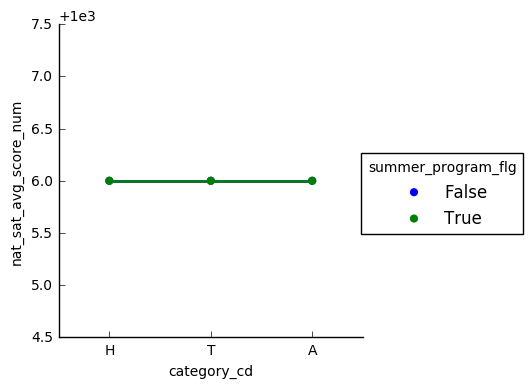

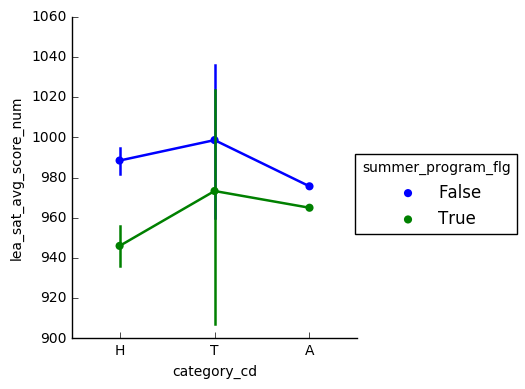

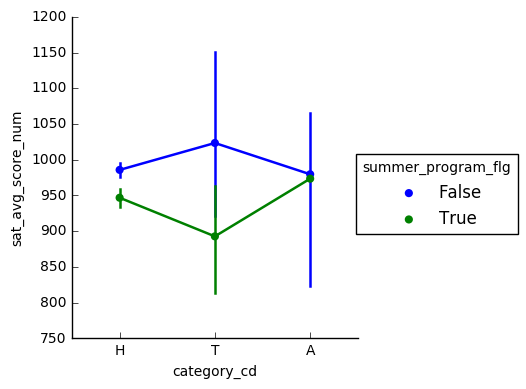

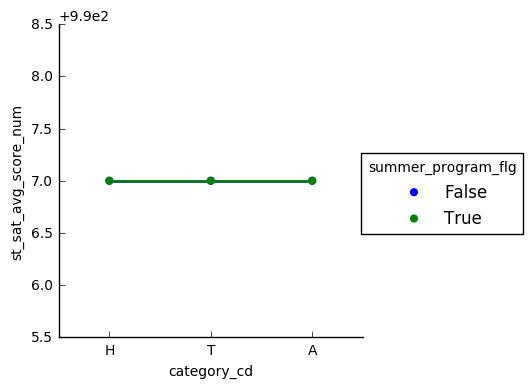

In [24]:
# factor plots for scores vs teacher experience considering categorical factors
for i in range(0, len(Achievement_measures)):
    sns.factorplot('category_cd',Achievement_measures[i],hue='summer_program_flg',data=new_schooldata)

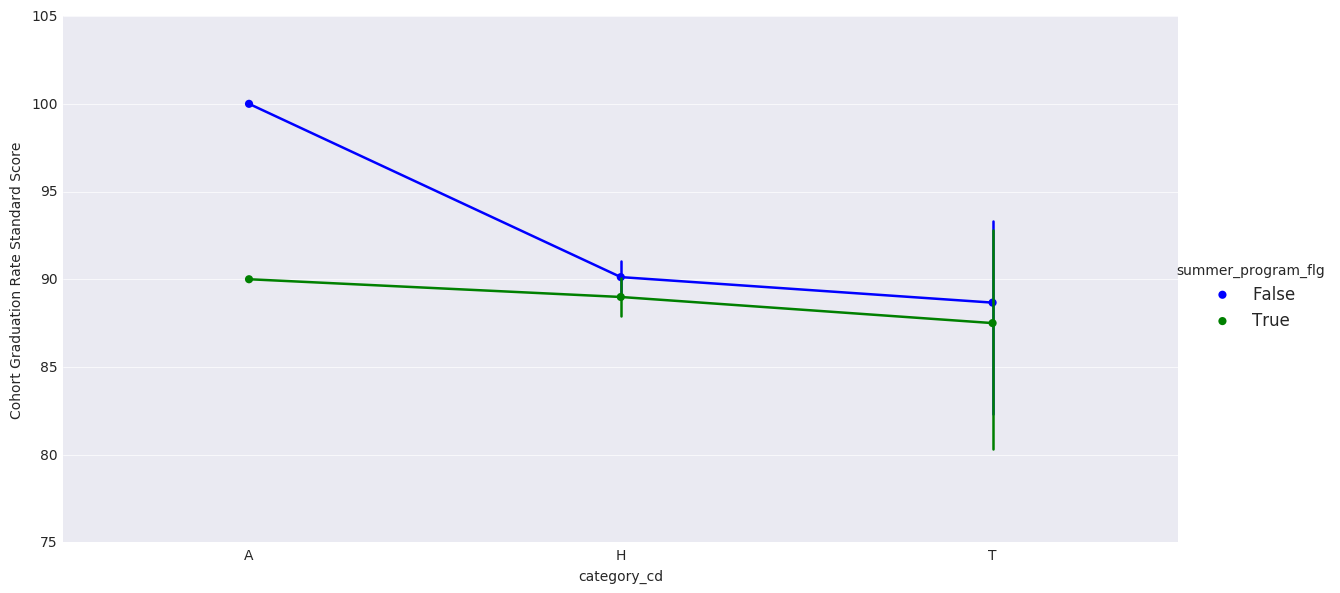

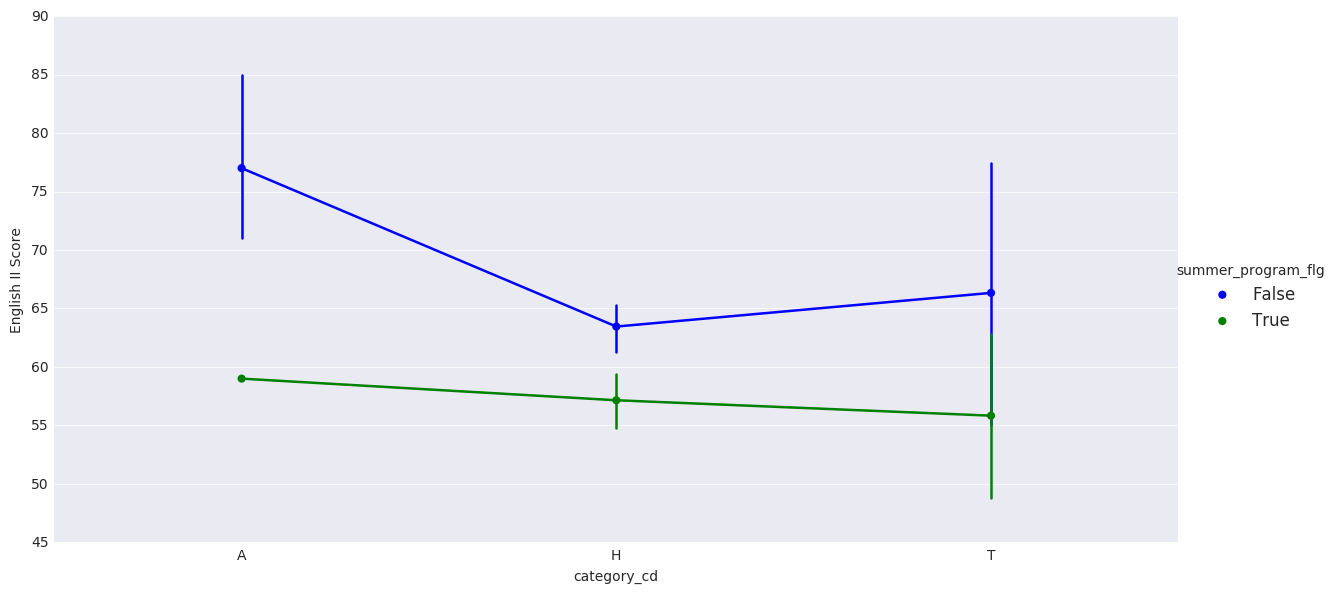

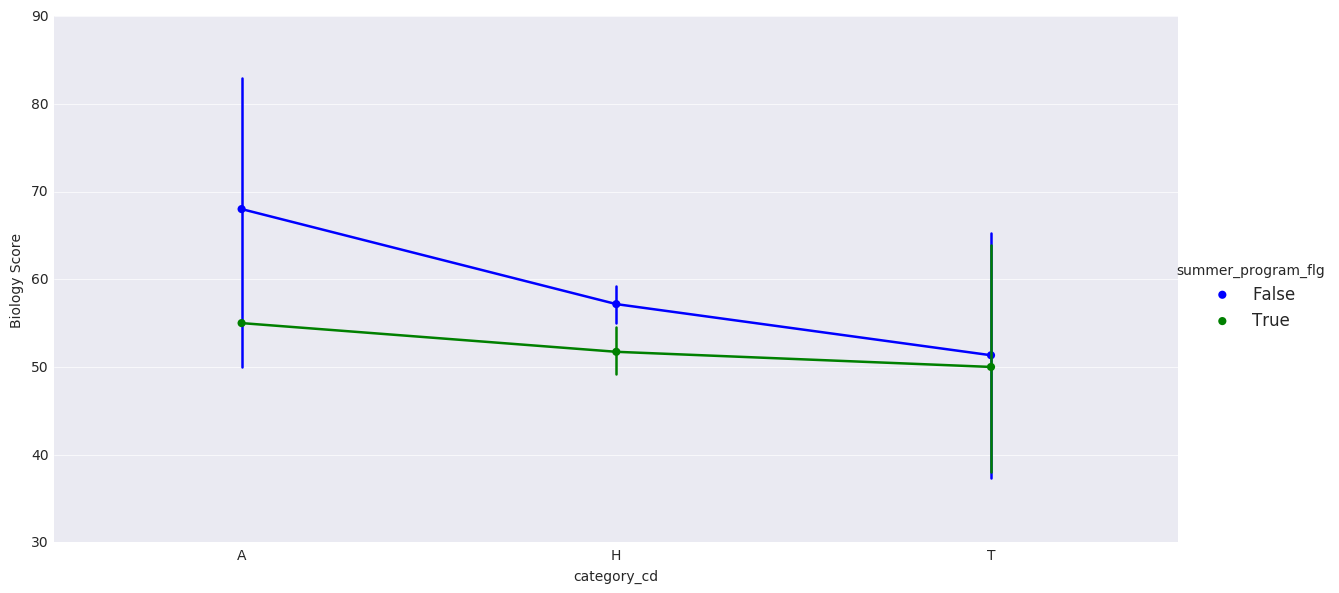

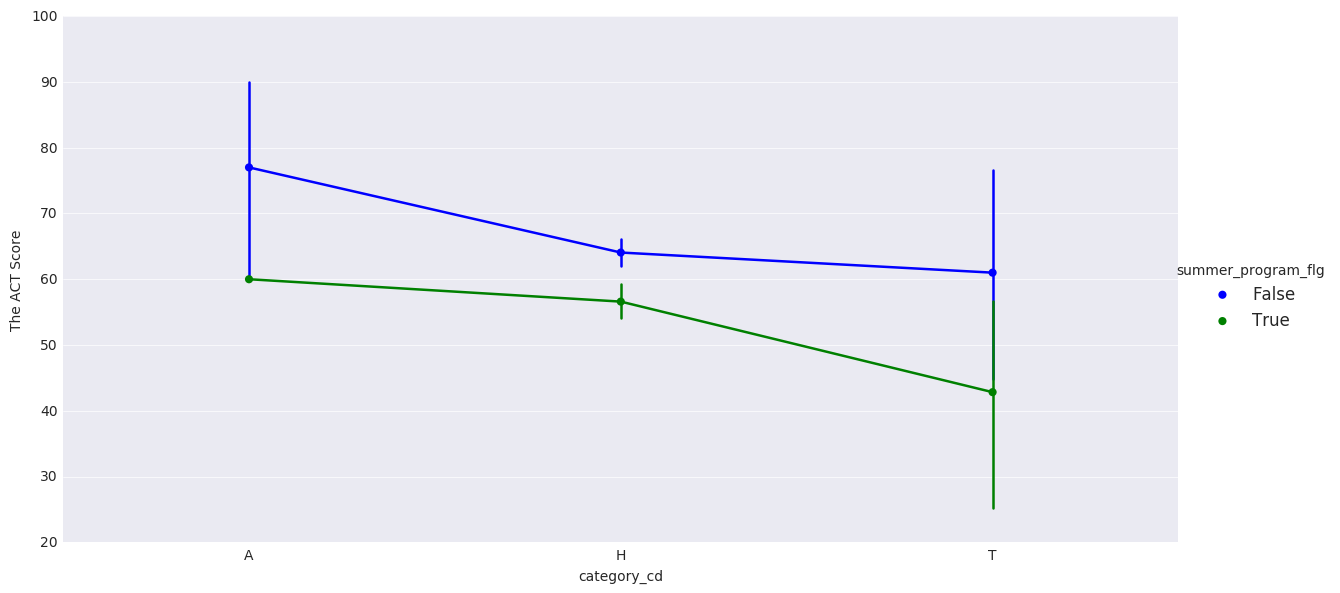

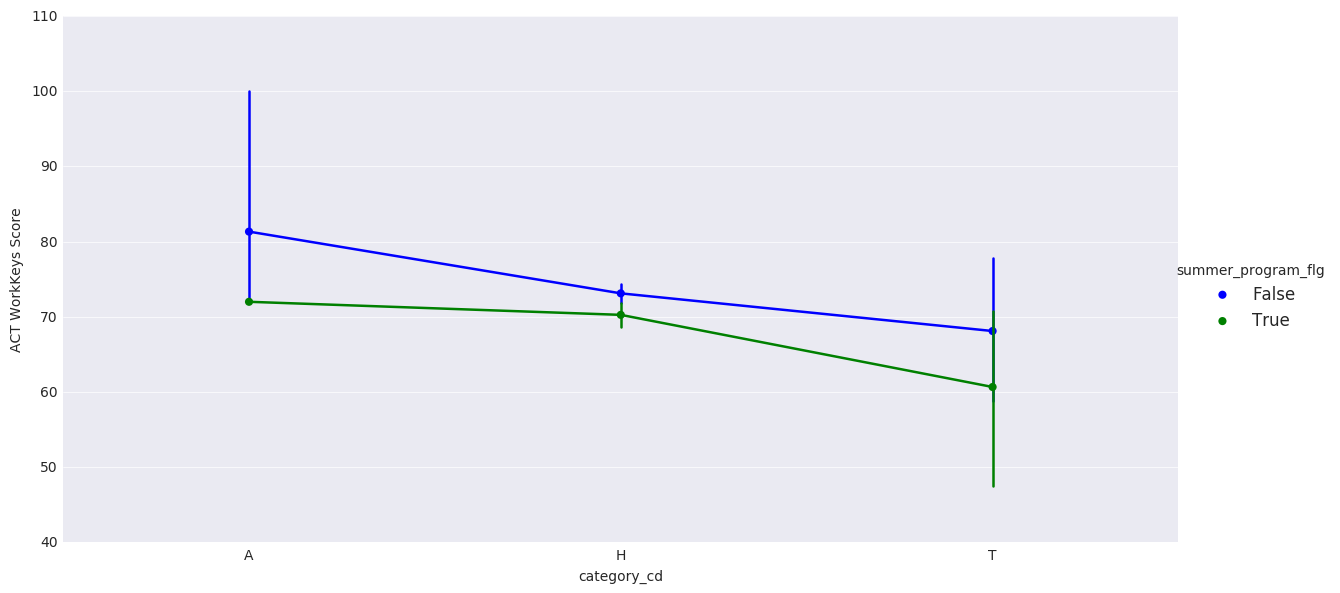

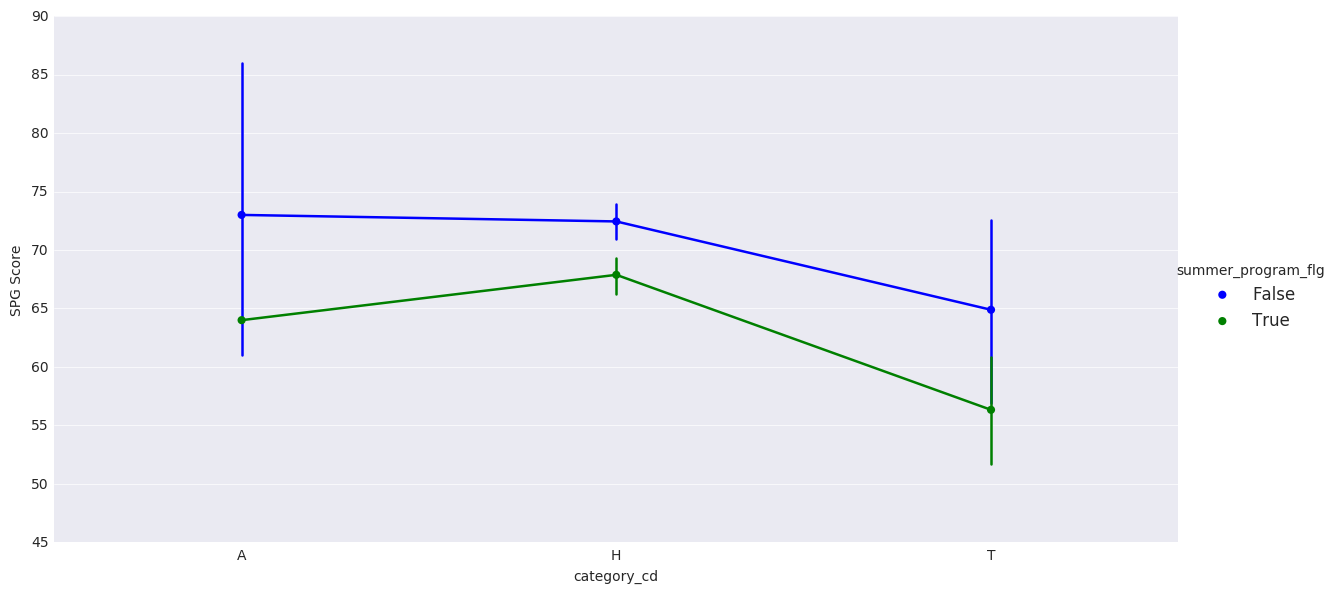

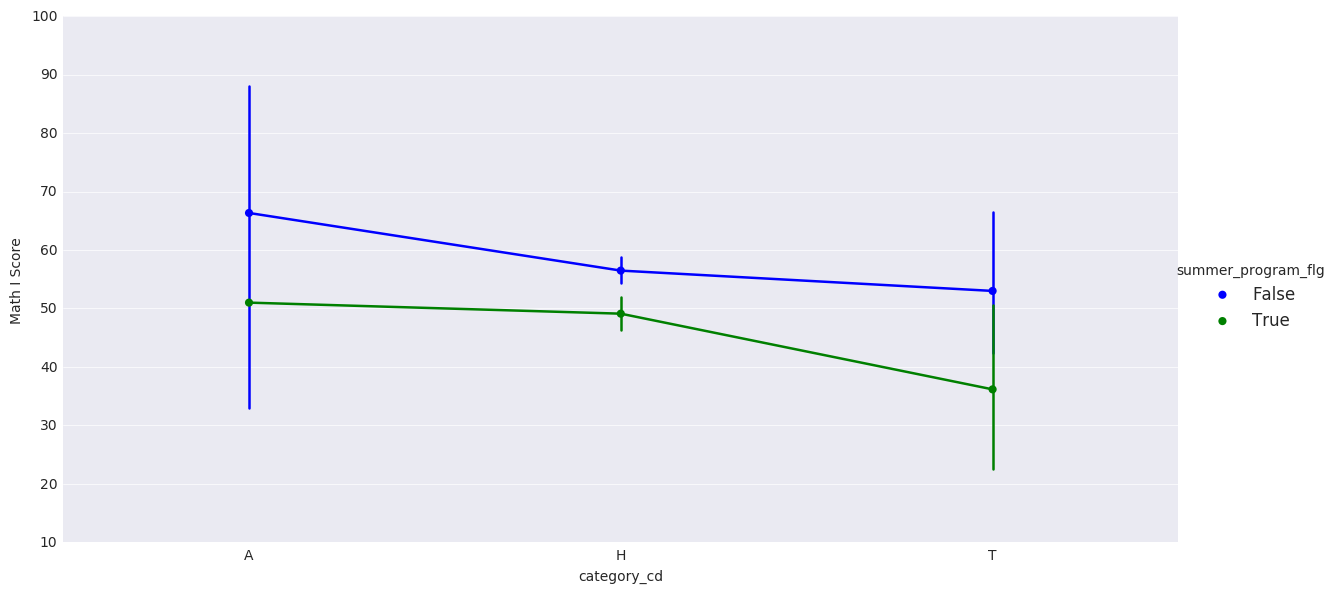

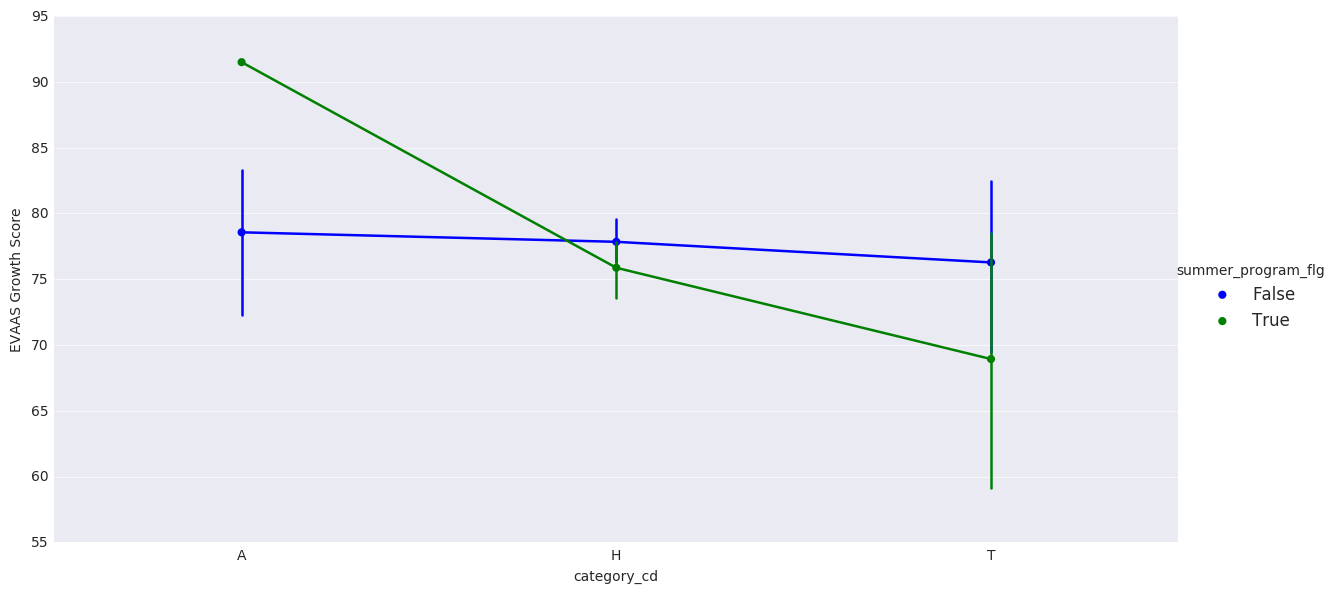

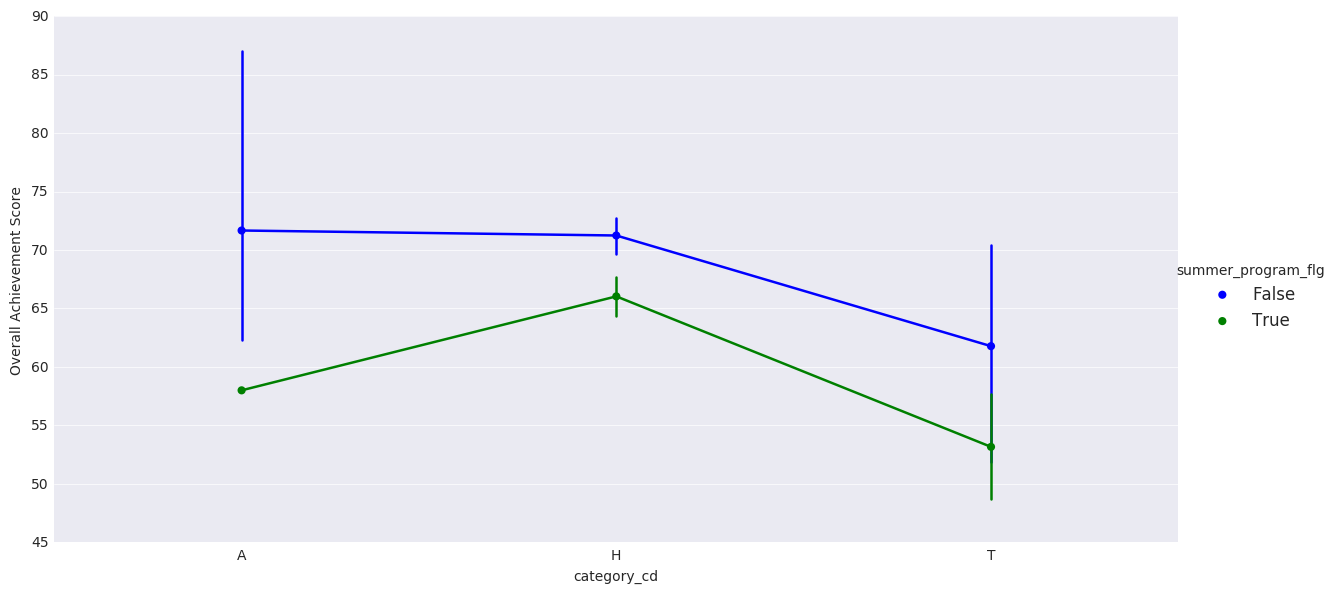

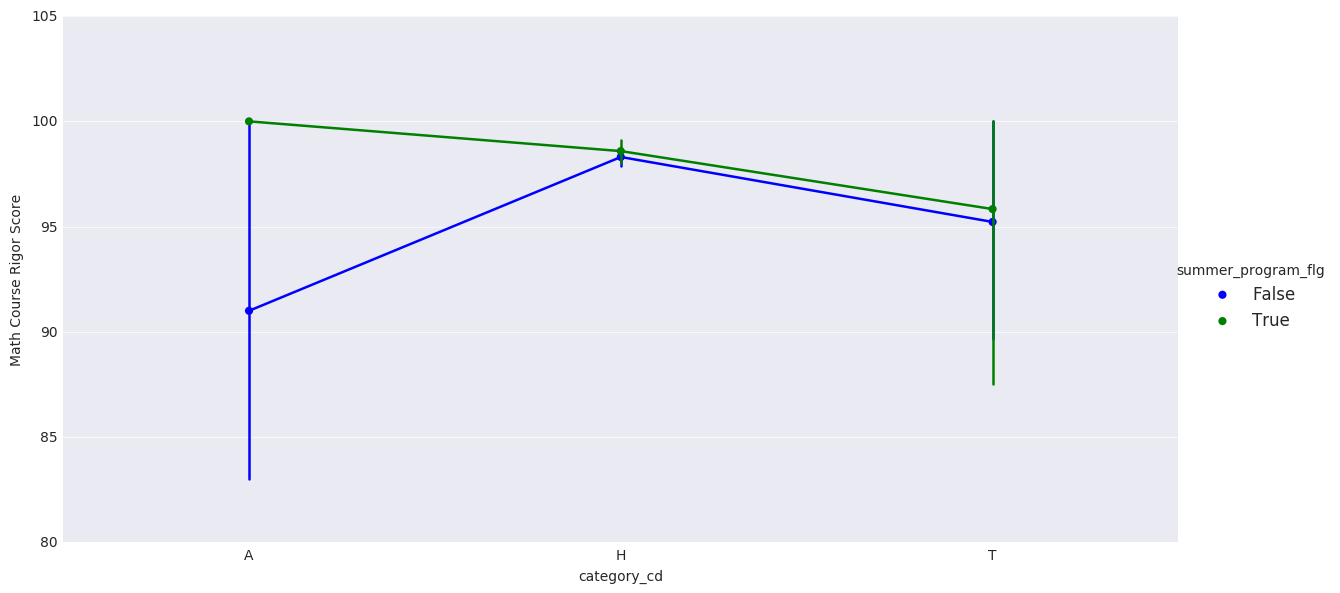

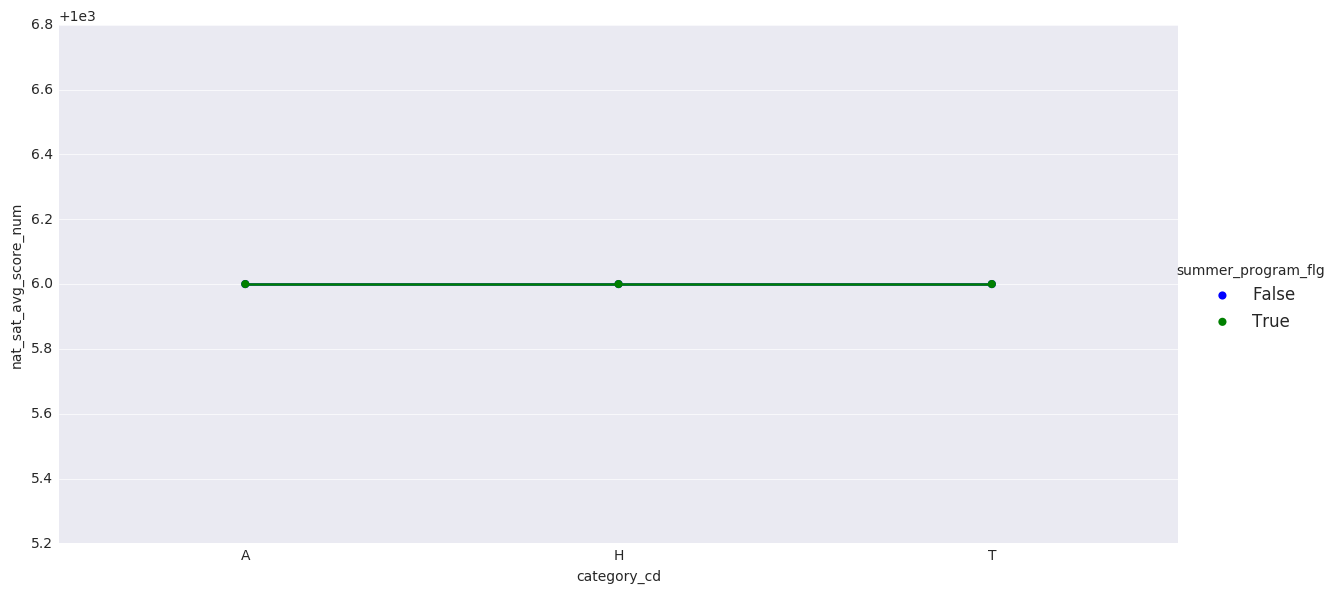

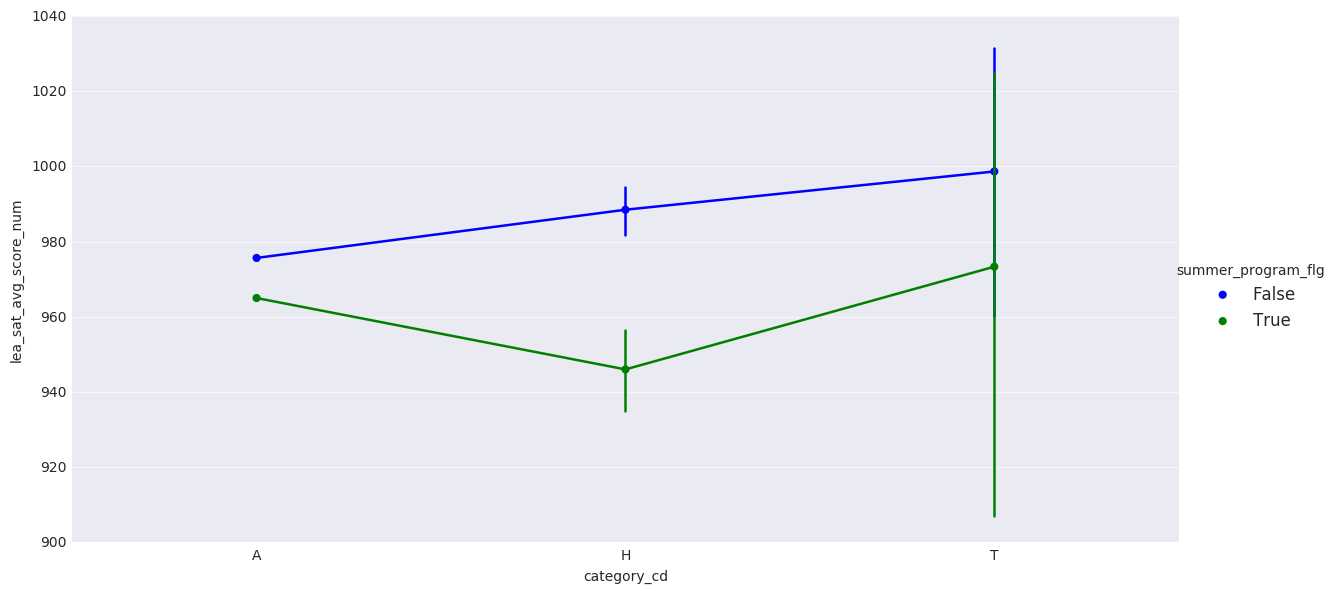

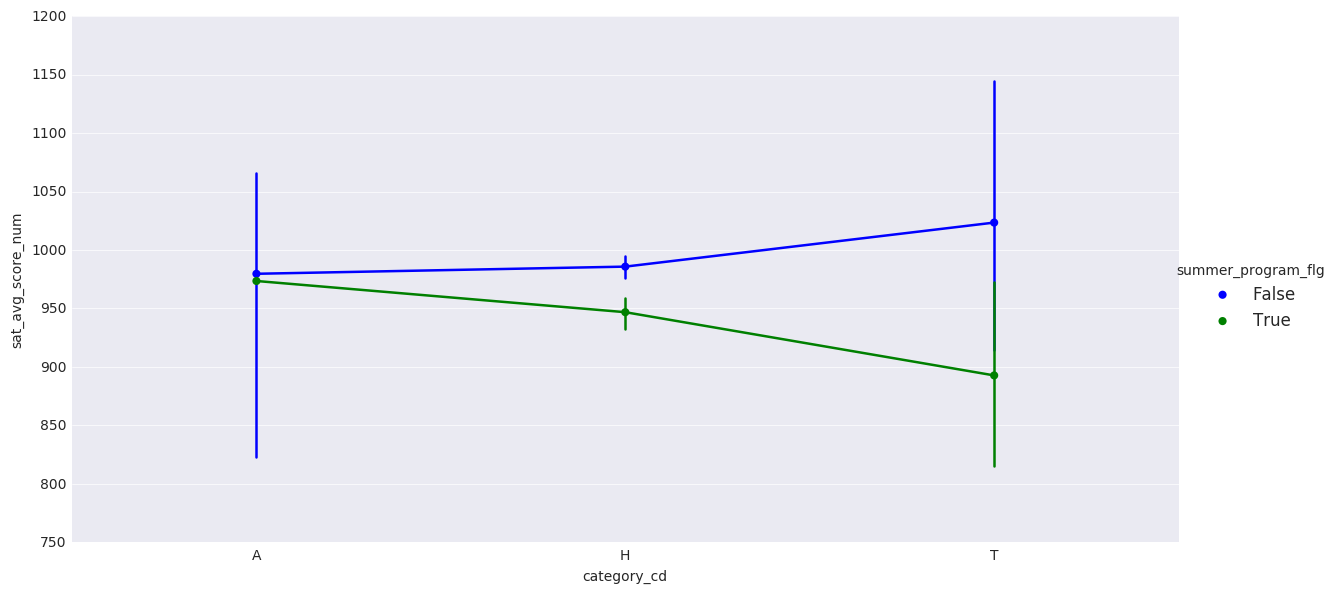

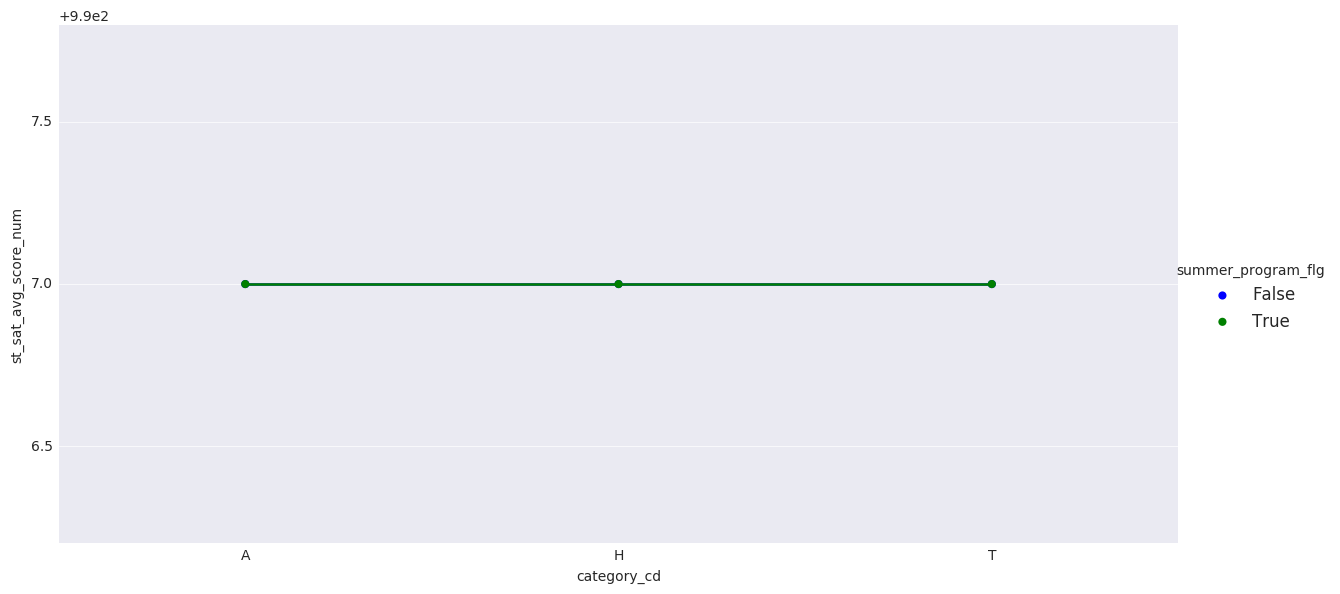

In [25]:
#Sort the x-axis (catagory_cd) from above
with sns.axes_style("darkgrid"):
    new_schooldata2=new_schooldata.sort_values(axis =0, by='category_cd')
    for i in range(0, len(Achievement_measures)):
        sns.factorplot('category_cd',Achievement_measures[i],data=new_schooldata2,hue='summer_program_flg', size = 6, aspect=2)

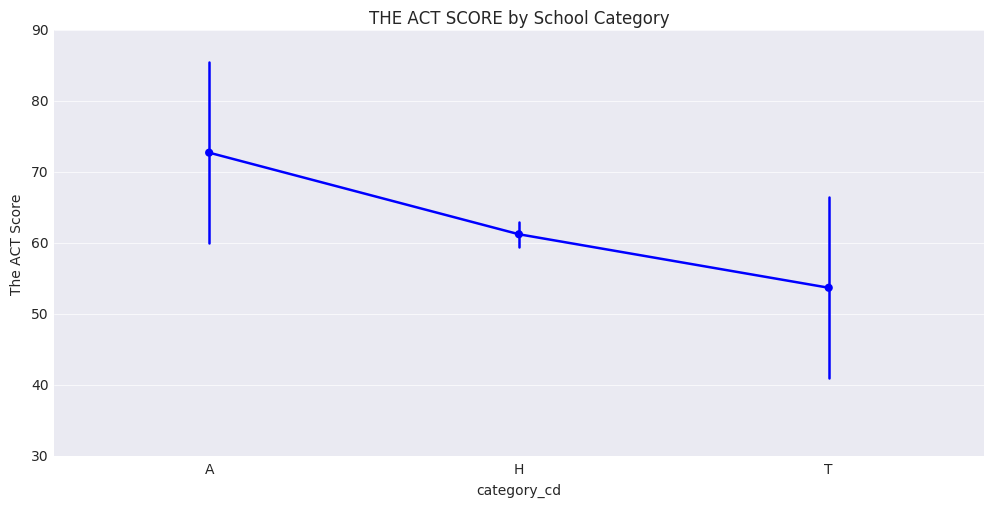

In [26]:
#sns.set_style("dark")

with sns.axes_style("darkgrid"):
    sns.factorplot('category_cd','The ACT Score',data=new_schooldata2,size=5, aspect=2)
    plt.title('THE ACT SCORE by School Category')

> From the above three code blocks, a strong correlation exists between School catagory_cd and its performance in the different performance and test scores measures.Considering Math Score,The ACT Score, Biology Score, EVAAS Growth Score and cohort Graduation Rate Standard score, schools category  A (Schools with elementary, middle and high school grades) performed much better followed by category H (Schools with high school grades 9-13) then Schools T (schools with middle and high school grades). We show one plot for ACT which displays the trend being described. Since the number of Schools of category A=4  and T=15 are less than the 30 samples, though a posible trend exists, we do not draw a statistical conclusion on performance based on school catagory.

In [27]:
#finding a list of the most correlated features
c = new_schooldata.corr()#.abs()
s =pd.DataFrame(c.unstack())
#so = s.order(kind="quicksort")
s['Correlation Pair'] = s.index
s = s.reset_index()
#del s['index']
s.columns = ['Column1', 'Column2', 'correlation','Correlation Pair']
result = s.sort_values('correlation', ascending=0)
result1 = result[result.correlation<-0.3]
result2 = result[result.correlation>0.3]

frames =[result2, result1]

result3 = pd.concat(frames)
result3[result3.Column1.isin(['Cohort Graduation Rate Standard Score'])]

#result2[result2.Column1.isin(['Cohort Graduation Rate Standard Score'])]

,Column1,Column2,correlation,Correlation Pair
5365,Cohort Graduation Rate Standard Score,Cohort Graduation Rate Standard Score,1.000000,"(Cohort Graduation Rate Standard Score, Cohort Graduation Rate Standard Score)"
5484,Cohort Graduation Rate Standard Score,Overall Achievement Score,0.668306,"(Cohort Graduation Rate Standard Score, Overall Achievement Score)"
5402,Cohort Graduation Rate Standard Score,SPG Score,0.654502,"(Cohort Graduation Rate Standard Score, SPG Score)"
5422,Cohort Graduation Rate Standard Score,Math I Score,0.595506,"(Cohort Graduation Rate Standard Score, Math I Score)"
5367,Cohort Graduation Rate Standard Score,English II Score,0.588560,"(Cohort Graduation Rate Standard Score, English II Score)"
5370,Cohort Graduation Rate Standard Score,Biology Score,0.586075,"(Cohort Graduation Rate Standard Score, Biology Score)"
5371,Cohort Graduation Rate Standard Score,The ACT Score,0.575374,"(Cohort Graduation Rate Standard Score, The ACT Score)"
5361,Cohort Graduation Rate Standard Score,avg_daily_attend_pct,0.447396,"(Cohort Graduation Rate Standard Score, avg_daily_attend_pct)"
5505,Cohort Graduation Rate Standard Score,One_Yr_College_Complete_wi_2_yrs_Enrolled_2012,0.427701,"(Cohort Graduation Rate Standard Score, One_Yr_College_Complete_wi_2_yrs_Enrolled_2012)"
5478,Cohort Graduation Rate Standard Score,sch_percent_college_enrolled_16_mos_post_grad,0.427701,"(Cohort Graduation Rate Standard Score, sch_percent_college_enrolled_16_mos_post_grad)"


> From the correlation table above afew things are learned. As expected, there exists a strong positive correlation between standardized tests and cohort graduation rate. Though one could have expected Cohort graduation rate to be strongly correlated to Average daily attendance 'avg_daily_attend_pct', the correlation comes in as a moderate  0.44. There exists a moderate negative correlation (-0.48) between short term suspension (short_susp_per_c_num) and Cohort graduation rate. 

> Below we show joint regreation plot to illustrate positive correlation between Cohort graduation rate standard Score and Overrall achievement School and one negative correlation between Cohort Graduation Rate Standard Score and  short_susp_per_c_num

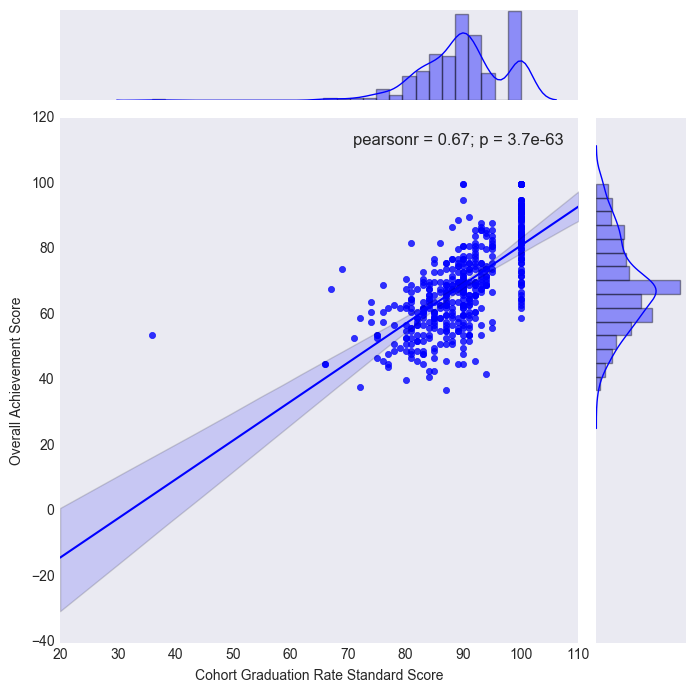

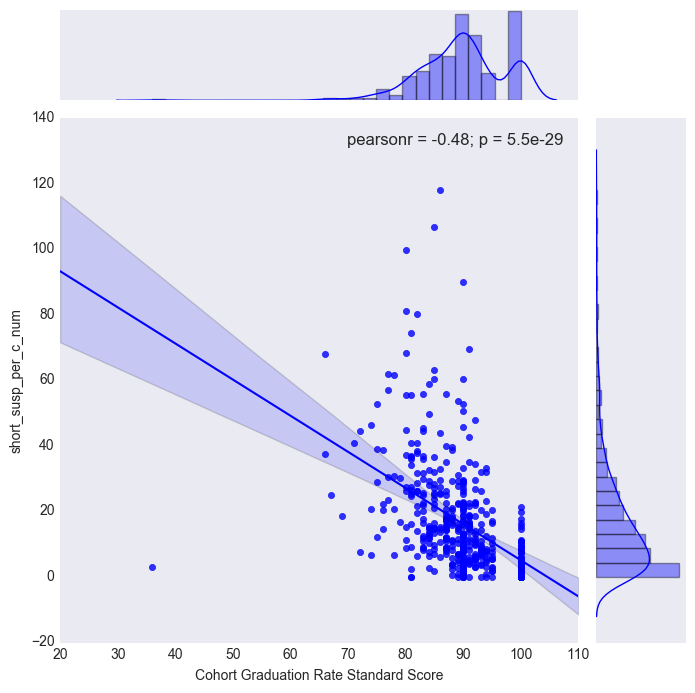

In [28]:
sns.set_style("dark")
sns.jointplot(new_schooldata['Cohort Graduation Rate Standard Score'], new_schooldata['Overall Achievement Score'], size=7, kind ='reg')
sns.jointplot(new_schooldata['Cohort Graduation Rate Standard Score'], new_schooldata['short_susp_per_c_num'], size=7, kind ='reg')


### Explore Attributes and Class 

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1516831600677' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cr&#47;CrimeRates_5&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CrimeRates_5&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cr&#47;CrimeRates_5&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1516831600677');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

> Geographical maps showing crime and graduation data by zip code. (Graduation Rate color scale centered at 80%) (Hover to see see data by zip code. Adjust crime rate scale to filter both maps)

> The Crime Rates map displays the number of crimes per 100 students for a given zip code (the rates are taken at a log scale due to the scale of the data). The Graduation Rates map shows the 4 year graduation rates for a given zip code. Our initial thought was that a geographic region with high crime rates would also have low graduation rates. When we filter off regions with lower crime rates, we can see that the areas that remain in the Graduation Rates map contain regions with low graduation rates.

### New Features 

In [30]:
#1
#################################################
#               New Features                    #
#################################################
# create Factors for 'Overall Achievement Score'
# A: 85-100
# B: 70-84
# C: 55-69
# D: 40-54
# F:<40
new_schooldata = new_schooldata.assign(Overall_Achievement_Score_bins = pd.cut(np.array(new_schooldata['Overall Achievement Score']), 
                                              5, labels=["<40", "40-54", "55-69",'70-84',"85-100"]))
#2
#SchoolWeightedScore:  Summation of all achievement measures Scores.
bin1 = ['EVAAS Growth Score','Overall Achievement Score' ] # Weight 0.6
bin2 = ['The ACT Score','ACT WorkKeys Score' ,'Math Course Rigor Score'] # weight 0.3
bin3 = ['Math I Score', 'English II Score','Biology Score'] # EOC scores weight 0.1
#print(Achievement_measures)
new_schooldata = new_schooldata.assign(BIN1=new_schooldata[bin1].sum(axis=1)*.6)
new_schooldata = new_schooldata.assign(BIN2=new_schooldata[bin2].sum(axis=1)*.3)
new_schooldata = new_schooldata.assign(BIN3=new_schooldata[bin3].sum(axis=1)*.1)
groupedbins = ['BIN1','BIN2','BIN3']
new_schooldata = new_schooldata.assign(SchoolWeightedScore = new_schooldata[groupedbins].sum(axis =1))

new_schooldata.T

#3
# income features/ social economic/ Per capita

#4 
#population data from state census data

,0,1,2,3,4,5,6,7,8,9,...,468,469,470,471,472,473,474,475,476,477
lea_salary_expense_pct,0.631,0.631,0.631,0.631,0.631,0.631,0.631,0.632,0.611,0.574,...,0.642,0.615,0.615,0.615,0.615,0.647,0.647,0.647,0.647,0.621
st_1yr_tchr_trnovr_pct,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,0.148,...,0.148,0.148,0.148,0.148,0.148,0.157,0.148,0.148,0.148,0.148
lea_emer_prov_teach_pct,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.027,0.005,...,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005
st_not_highqual_class_all_pct,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,...,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037
lea_avg_age_media_collection,2000,1999,1999,1999,1999,1999,1999,1997,1999,2000,...,2000,1998,1998,1998,2000,1999,1999,1999,2000,1998
lea_services_expense_pct,0.074,0.074,0.074,0.074,0.074,0.074,0.074,0.055,0.087,0.095,...,0.058,0.076,0.076,0.076,0.076,0.06,0.06,0.06,0.06,0.084
wap_num,65,64,66,70,74,83,70,117,43,14,...,12,72,88,92,7,11,46,48,7,75
focus_clp_flg,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
digital_media_pct,0.01,0,0,0.01,0,0.01,0.01,0,0.03,0.01,...,0.01,0,0.1,0.01,0.01,0.05,0.02,0.01,0.01,0.18
_1yr_tchr_trnovr_pct,0,0.128,0.2,0.14,0.098,0.148,0.084,0.164,0.087,0.095,...,0.1,0.166,0.068,0.172,0.13,0.118,0.124,0.177,0,0.109


> From above code, we have created two new features from our dataset.

> 1. Overall_Achievement_Score_bins:
this is to groub the Overall Achievement Score into bins 
A: 85-100,
B: 70-84,
C: 55-69,
D: 40-54,
F:<40
> 2. SchoolWeightedScore: Summation of all achievement measures Scores.`EVAAS Growth Score` and `Overall Achievement Score` are put on bin1 and given a  weight 0.6 of the overall weighted school school.`The ACT Score`, `ACT WorkKeys Score` , and `Math Course Rigor Score` are put in bin 2 carrying a weight of 0.3 while bin3 contains End of Course scores for `Math I Score`, `English II Score`, and `Biology Score` given a weight 0.1. When we get to lab two, we will use this features to see if they improve our model performance.

Refer to visualizations below for this two newly created features.

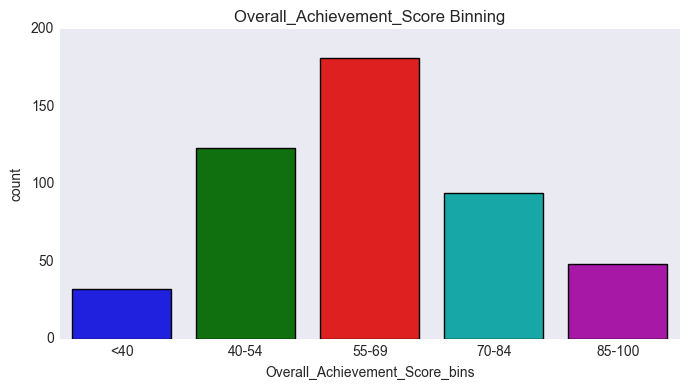

In [31]:
f, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="Overall_Achievement_Score_bins", data=new_schooldata )
plt.title('Overall_Achievement_Score Binning')

> Binning distribution of Overall achievement score is normal. Majority of the High schools in NC fall in the C grade bin (55-69). 

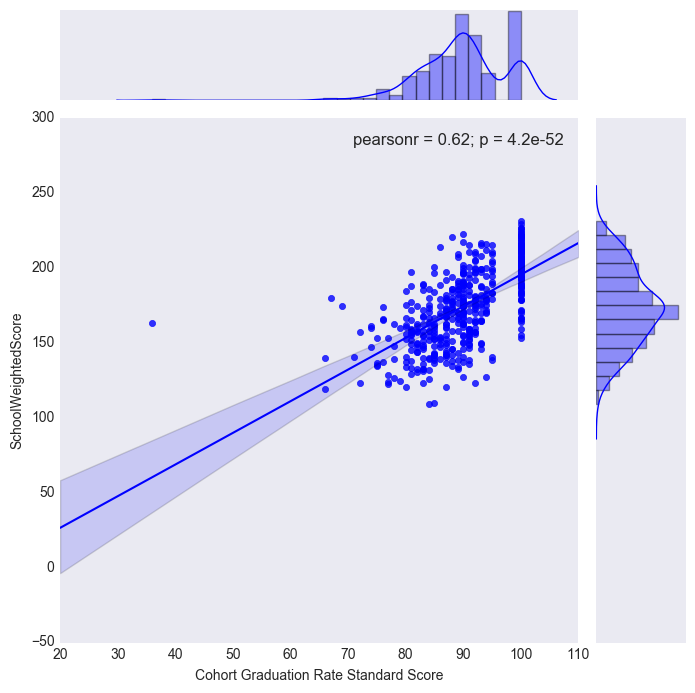

In [32]:
sns.jointplot(new_schooldata['Cohort Graduation Rate Standard Score'], new_schooldata['SchoolWeightedScore'], size=7, kind ='reg')



> Interestingly, our newly created feature ,'SchoolWeightedScore' depicts a  strong positve correlation to Cohort graduation Standard Score as expected with a pearson R of 0.62. There is also one outlier school which shows up with a moderate SchoolWeightedScore but with a ver low Cohort Graduation Rate Standard school of ~34. When we get to modeling, we will consider removing this outlier school. 

> Below we explore the benefits of removing that one outlier point in our data to our overrall regression model. Our pearson R improves to 0.65

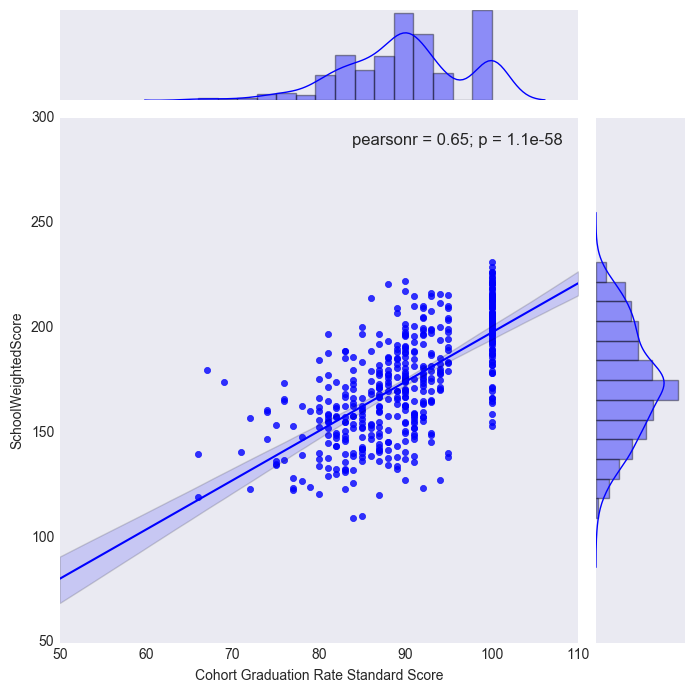

In [38]:
temp = new_schooldata[new_schooldata['Cohort Graduation Rate Standard Score']>60]
sns.jointplot(temp['Cohort Graduation Rate Standard Score'], temp['SchoolWeightedScore'], size=7, kind ='reg')



### Exceptional Work 

### Tableau write up

In [34]:
%%HTML
<div class='tableauPlaceholder' id='viz1516834830784' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;NC&#47;NCDatabyRegion&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NCDatabyRegion&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;NC&#47;NCDatabyRegion&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1516834830784');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [35]:
%%HTML
<div class='tableauPlaceholder' id='viz1517077975911' style='position: relative'><noscript><a href='#'><img alt='Grad Rates ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;GraduationRatesDrilldown&#47;GradRates&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GraduationRatesDrilldown&#47;GradRates' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;GraduationRatesDrilldown&#47;GradRates&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1517077975911');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

> Drill down bar graph of Graduation Rates by Region, District, and School. (Use tab at top-center to navigate) (Graduation Rate color scale centered at 80%)

> The drill down structure of this bar graph allows us to view graduation rates aggregated to the region and district level, as well as per school. We can see at the region level that graduation rates are strong overall with the lowest region being SandHills at 86.07%. As an example of how this visualization can be utilized we will investigate the SandHills reason to locate the problem areas. From the district tab we navigate to the SandHills region column and can see that of it's 13 districts, 2 are below the 80% threshold with another district fairly close to the cut-off. (Charter Schools: 78.60&, Moore County Schools: 77.33%, Montgomery County Schools: 80.40%). To see which schools are bringing these three district's graduation rates down we go to the School tab. When we look at Charter Schools we see that only one school, Flemington Academy (78.60%), of the 9 in this district reported graduation rates. (It is important to note here that there are Charter School districts in all regions so it is necessary to navigate to the SandHill section before looking at the desired Charter School district). In the Moore County Schools district we see that 4 of the 21 schools report graduation rates with the lowest being The Community Learning Center @ Pinckney (38.90%). And finally, in the Montgomery County Schools district 3 of the 10 schools report graduation rates with the lowest being Montgomery Learning Academy (54.20%). Some of these schools do not report graduation rates, as defined by the variable, because they are elementry schools and as such have no bearing on our current analysis. We can use this information on regions, districts, and schools in an effort to quickly locate trouble spots. Once these at-risk schools are found, we can investigate possible causes as to why they have lower than average graduation rates.